# <u><center>What Does It Take To Succeed In The Premier League?</center></u>

The English Premier League, together with the English Football League, currently consist of 92 teams. Beyond that, the National League contains a further 67 teams vying for promotion and a chance to compete on the highest stage. Despite this abundance of football teams, since its inception in 1992 only 7 teams have ever won the Premier League. What is it that sets these teams apart from the rest? What does it take to succeed in the Premier League?

This report looks at 10 seasons' worth of data on the English Premier League in an attempt to determine which statistics are most important when it comes to success. The Premier League is a rapidly changing environment in terms of players, management, and clubs, as well as aspects such as revenue, turnover and even rules. It is for this reason that the report focuses only on the last 10 seasons' worth of data: from 2010/2011 to 2019/2020.

The report begins by examining the number of points required to win the league for each of these 10 seasons. The aim is to establish whether there is a certain number of points that guarantee the top spot, or if it changes by season and if so, how.

However, it is important to remember that success is a relative term. For the top clubs, a season is only successful if they win the Premier League. For others, qualification for European competitions or finishing in the top half of the table constitutes success. And for some teams, simply avoiding relegation can be considered a triumph. Consequently, the report also looks beyond points totals to final league positions. A number of variables are considered for each position in the league, for each season, to see if there is a correlation between these variables and a club's final position. These variables include:

* Goals Scored
* Goals Conceded
* Overall Goal Difference
* Expected Goals Scored
* Expected Goals Conceded
* The time period in which goals were scored
* The time period in which goals were conceded
* Yellow and Red Cards
* Revenue and Wages
* Average Attendance
* Geographical Location

The report finishes with a discussion of the findings and a recommendation for further exploration and analysis.

The data used throughout the report is open source and widely published. There is no requirement to anonymise the data, and there are no ethical concerns to be considered when reproducing and analysing the data.

## 1. <u>Libraries</u>

Before beginning, any libraries that will be required for data gathering, processing and analysis are imported.

In [1]:
# Import necessary libraries:

import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import folium

## 2. <u>Data Gathering</u>

### 2.1 Data for Final League Tables

There are numerous sources of data for the English Premier League. However, most of these sources do not contain all of the data that is required for this project. Therefore, several initial steps must be carried out in order to gather all of the necessary data. The first step is to get the final league tables for each season. While such tables are readily available, most tend to include only basic information. Therefore, individual match data is used here in order to compile final league standings. The data has been accessed from http://www.football-data.co.uk/englandm.php. 

The original data is stored in CSV file format, and can be accessed directly from individual URLs for each season. Each URL takes the general form "http://www.football-data.co.uk/mmz4281/{}/E0.csv" where {} is the year of the season in the format yyyy (for example "http://www.football-data.co.uk/mmz4281/1011/E0.csv" holds the data for season 2010/2011). To avoid typing out each URL, a list is created for all of the seasons needed. This list is then used to create a list of URLs.

In [2]:
# Create a list of seasons which will be used to get the URLs:

seasons = []
for i in range(10,20):
    seasons.append("{}{}".format(i, i+1))

In [3]:
# Create a list of URLs:

urls = []
for season in seasons:
    urls.append("http://www.football-data.co.uk/mmz4281/{}/E0.csv".format(season))

Each URL in the list of URLs is used to write the data to the local directory. This avoids having to download the data from the website each time. To do so would not only be inefficient, but would leave the report at risk of failure if the requisite data were changed, moved or deleted.

In [4]:
# Use the URLs to get access the CSV files and write them to the local directory
# (using the portion of the URL that represents the year as the filename):

# (NOTE - this cell is commented out in order to avoid downloading the CSV files every time.)

#for url in urls:
#    temp_csv = requests.get(url)
#    with open(".\{}.csv".format(url[-11:-7]), "wb") as f:
#        for chunk in temp_csv:
#            f.write(chunk)
#    f.close()

The website which is the source of the original data also includes a text file which explains the columns of the data found in the CSV files. This information is useful in order to decide which features to keep for the analysis. As with the CSV files, it is first saved to the local directory and is then read back into the report and displayed on screen.

In [5]:
# Download the info file about the data directly from the website
# Save it to the local directory

# (NOTE - this cell is commented out in order to avoid downloading the text file every time.)

#file_data = requests.get("http://www.football-data.co.uk/notes.txt")
#with open(".\data_info.txt", "w") as f:
#    f.write(file_data.text)
#f.close()

In [6]:
# Open the text file and print out the information

f = open("./data_info.txt", "r")
print(f.read())
f.close()

Notes for Football Data



All data is in csv format, ready for use within standard spreadsheet applications. Please note that some abbreviations are no longer in use (in particular odds from specific bookmakers no longer used) and refer to data collected in earlier seasons. For a current list of what bookmakers are included in the dataset please visit http://www.football-data.co.uk/matches.php



Key to results data:



Div = League Division

Date = Match Date (dd/mm/yy)

Time = Time of match kick off

HomeTeam = Home Team

AwayTeam = Away Team

FTHG and HG = Full Time Home Team Goals

FTAG and AG = Full Time Away Team Goals

FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)

HTHG = Half Time Home Team Goals

HTAG = Half Time Away Team Goals

HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)



Match Statistics (where available)

Attendance = Crowd Attendance

Referee = Match Referee

HS = Home Team Shots

AS = Away Team Shots

HST = Home Team Shots on Target

AST 

From the displayed information it can be seen that there is a lot of betting information which is irrelevant for the purposes of this report. The information that is required is as follows:

* 'HomeTeam'
* 'AwayTeam'
* 'FTHG' (Full-Time Home Goals)
* 'FTAG' (Full-Time Away Goals)
* 'FTR' (Full-Time Results)
* 'HY' (Home Team Yellow Cards)
* 'AY' (Away Team Yellow Cards)
* 'HY' (Home Team Red Cards)
* 'AY' (Away Team Red Cards)

At this point it is noted that, while the information file above indicates that 'Attendance' is available in the data set, upon manual inspection of the files it was discovered that attendance figures are not available for the seasons analysed by this report. Attendance data will therefore have to be gathered from another source.

Further, while information pertaining to the date will be important for the analysis, it will only be used on a season-by-season level. The date on which individual matches took place is not required. While the date column could be imported and only the year kept, this could easily create confusion due to the fact that each season spans two years. Consequently, the date column is not imported and the season is manually added to the data at a later time.

The CSV files are read into the report from the local directory as Pandas DataFrames, using the columns specified above.

In [7]:
# Read the data from the CSV files into Pandas DataFrames, specifying the columns to use:

col_list = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HY', 'AY', 'HR', 'AR']
df1011 = pd.read_csv("./1011.csv", usecols = col_list)
df1112 = pd.read_csv("./1112.csv", usecols = col_list)
df1213 = pd.read_csv("./1213.csv", usecols = col_list)
df1314 = pd.read_csv("./1314.csv", usecols = col_list)
df1415 = pd.read_csv("./1415.csv", usecols = col_list)
df1516 = pd.read_csv("./1516.csv", usecols = col_list)
df1617 = pd.read_csv("./1617.csv", usecols = col_list)
df1718 = pd.read_csv("./1718.csv", usecols = col_list)
df1819 = pd.read_csv("./1819.csv", usecols = col_list)
df1920 = pd.read_csv("./1920.csv", usecols = col_list)

In [8]:
# Whenever new DataFrames are created, or major changes are applied to existing DataFrames,
# the 'head' method will be used to ensure that the DataFrame appears as expected.

df1011.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HY,AY,HR,AR
0,14/08/10,Aston Villa,West Ham,3,0,H,1,2,0,0
1,14/08/10,Blackburn,Everton,1,0,H,2,1,0,0
2,14/08/10,Bolton,Fulham,0,0,D,1,3,0,0
3,14/08/10,Chelsea,West Brom,6,0,H,1,0,0,0
4,14/08/10,Sunderland,Birmingham,2,2,D,3,3,1,0


### 2.2 Data for Expected Goals

Expected goals is a relatively new metric in football. As a result, data is only available for the seasons from 2014 to present. The data used for this report comes from the data repository Kaggle (https://www.kaggle.com/slehkyi/extended-football-stats-for-european-leagues-xg). The CSV file has been downloaded and saved directly into the local directory.

In [9]:
# Read the data from the CSV file into Pandas DataFrames:

xGdf = pd.read_csv("./understat.com.csv")

In [10]:
# Check that everything looks ok:

xGdf.head()

,Unnamed: 0,Unnamed: 1,position,team,matches,wins,draws,loses,scored,missed,...,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,...,28.444293,7.444293,24.727907,73.049305,5.683535,16.367593,489,114,94.0813,0.0813
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,...,42.607198,4.607198,38.890805,47.213090,10.209085,12.929510,351,153,81.7489,-10.2511
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,...,29.069107,0.069107,26.839271,25.748737,8.982028,9.237091,197,123,73.1353,-4.8647
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,...,39.392572,7.392572,33.446477,16.257501,8.709827,7.870225,203,172,63.7068,-13.2932
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,...,47.862742,2.862742,41.916529,20.178070,8.276148,9.477805,305,168,67.3867,-8.6133


### 2.3 Goal Time Data

Goal time data is available from www.soccerstats.com for the seasons 2012/13 - 2019/20. The data is presented on the site in tables, so the Pandas read_html method is used to collect the information. Initially, the URL was passed directly to this method, but this resulted in an HTTP Error 403: Forbidden. To get round this, the data was requested using the requests.get method, and the tables read from the results.

Upon inspection, it was discovered that the information required was held in the 12th table on the website for all but the 2019/20 season, where the relevant table was the 13th table.

As with the league table data, the goal time data is downloaded and then saved to the local directory. The first row and first column of each table is not required for the analysis, so these are ignored when reading to CSV.

In [11]:
# Function to create the DataFrames:

def get_tables(url):
    """Gets a requests.Response object from the provided url
    and reads all tables into Pandas DataFrames."""
    r = requests.get(url)
    return pd.read_html(r.text)

In [12]:
# Commented out to prevent reading in the data every time.

#timetables1213 = get_tables('https://www.soccerstats.com/timing.asp?league=england_2013')
#timetables1314 = get_tables('https://www.soccerstats.com/timing.asp?league=england_2014')
#timetables1415 = get_tables('https://www.soccerstats.com/timing.asp?league=england_2015')
#timetables1516 = get_tables('https://www.soccerstats.com/timing.asp?league=england_2016')
#timetables1617 = get_tables('https://www.soccerstats.com/timing.asp?league=england_2017')
#timetables1718 = get_tables('https://www.soccerstats.com/timing.asp?league=england_2018')
#timetables1819 = get_tables('https://www.soccerstats.com/timing.asp?league=england_2019')
#timetables1920 = get_tables('https://www.soccerstats.com/timing.asp?league=england_2020')

In [13]:
# Commented out to avoid errors as a result of the list elements being
# undefined when the cells above are commented out.

#timedfs = [timetables1213[11], timetables1314[11], timetables1415[11],
#           timetables1516[11], timetables1617[11], timetables1718[11],
#           timetables1819[11], timetables1920[12]]

In [14]:
# Commented out as files are now saved on local drive.

#for i in range(0,len(timedfs)):
#    timedfs[i].to_csv(r".\goaltime{}{}.csv".format(i+12,i+13))

In [15]:
# Read the data from the CSV files into Pandas DataFrames:

timetables1213 = pd.read_csv("./goaltime1213.csv", index_col=1, header=1)
timetables1314 = pd.read_csv("./goaltime1314.csv", index_col=1, header=1)
timetables1415 = pd.read_csv("./goaltime1415.csv", index_col=1, header=1)
timetables1516 = pd.read_csv("./goaltime1516.csv", index_col=1, header=1)
timetables1617 = pd.read_csv("./goaltime1617.csv", index_col=1, header=1)
timetables1718 = pd.read_csv("./goaltime1718.csv", index_col=1, header=1)
timetables1819 = pd.read_csv("./goaltime1819.csv", index_col=1, header=1)
timetables1920 = pd.read_csv("./goaltime1920.csv", index_col=1, header=1)

In [16]:
# timesdf list redefined (due to commenting out above) for later use:

timedfs = [timetables1213, timetables1314, timetables1415,
           timetables1516, timetables1617, timetables1718,
           timetables1819, timetables1920]

In [17]:
# Check that everything looks ok:

timedfs[0].head()

,0,0-15,16-30,31-45,46-60,61-75,76-90,Unnamed: 8,1st H.,2nd H.,Unnamed: 11,Unnamed: 12,Unnamed: 13
Overall,,,,,,,,,,,,,
Arsenal,1,9-4,6-8,13-10,13-4,13-9,18-2,NaN,28-22,44-15,NaN,NaN,NaN
Aston Villa,2,6-7,5-6,11-12,10-13,5-15,10-16,NaN,22-25,25-44,NaN,NaN,NaN
Chelsea,3,9-7,14-4,16-4,10-7,13-7,13-10,NaN,39-15,36-24,NaN,NaN,NaN
Everton,4,9-12,8-3,15-5,8-3,5-5,10-12,NaN,32-20,23-20,NaN,NaN,NaN
Fulham,5,6-7,7-7,10-10,5-11,10-13,12-12,NaN,23-24,27-36,NaN,NaN,NaN


### 2.4 Financial Data

Financial data is available for the seasons 2012/13 - 2017/18 from the Guardian website (https://www.theguardian.com/uk). The information presented by the Guardian comes from each club's annual accounts, and therefore can be considered accurate. The data that used in this report is annual turnover and annual wage bill for each club. The data is scraped using the Beautiful Soup library. Due to inconsistencies in the way the data is presented for each season, four functions have been written in order to extract the relevant information.

The data for the seasons 2012/13 and 2013/14 are presented almost identically, and so both can be accessed using the same function (webscraper1).

In [18]:
# For use with seasons 12/13 and 13/14:

def webscraper1(url):
    """Scrapes the provided url for turnover and wage data, returning a
    Pandas DataFrame containing the team, turnover, and wage bill."""
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "lxml")
    turnover = []
    wages = []
    revised_turnover = []
    revised_wages = []
    teams = []
    # Manual inspection of the web pages reveals how turnover and wage bill
    # are referenced. This information is used to access the correct sentences:
    for data in soup.find_all('p'):
        if 'Turnover' in data.text and ' (' in data.text: 
            turnover.append(data.text.strip())
        if 'Wage bill' in data.text or 'Wage Bill' in data.text:
            wages.append(data.text.strip())
    # Again, manual inspection reveals where in each sentence the turnover
    # and wage bill can be located. This is used to gather just the required information:
    for item in turnover:
        start = item.index(', ')+2
        end = item.index(' (')
        revised_turnover.append(item[start:end])
    for item in wages:
        start = item.index(', ')+1
        end = item.index(' (')
        revised_wages.append(item[start:end])
    for t in soup.find_all('h2', class_=("")):
        teams.append(t.text.strip())
    return pd.DataFrame(zip(teams, revised_turnover, revised_wages), columns=['Team', 'Turnover', 'Wages'])

Data for season 2014/2015 is presented slightly differently. One approach would have been to edit the webscraper1 function to include additional input parameters to account for the differing presentations. However, this would have led to a somewhat 'messy' function with complicated input parameters and so the preferred solution was to create a new function. This new function, webscraper2, is copied from webscraper1 with just a slight modification in order to get the relevant information for the 2014/2015 season.

In [19]:
# For use with season 14/15:

def webscraper2(url):
    """Scrapes the provided url for turnover and wage data, returning a
    Pandas DataFrame containing the team, turnover, and wage bill."""
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "lxml")
    turnover = []
    wages = []
    revised_turnover = []
    revised_wages = []
    teams = []
    for data in soup.find_all('p'):
        if 'Turnover' in data.text: # The opening parenthesis is not required in this case
            turnover.append(data.text.strip())
        if 'Wage bill' in data.text: # 'Wage bill' is only written in one way
            wages.append(data.text.strip())
    for item in turnover:
        start = item.index('League ')+7 #No comma to use as a reference point
        end = item.index(',')
        revised_turnover.append(item[start:end])
    for item in wages:
        start = item.index('League ')+7 #No comma to use as a reference point
        end = item.index(',')
        revised_wages.append(item[start:end])
    for t in soup.find_all('h2', class_=("")):
        teams.append(t.text.strip())
    return pd.DataFrame(zip(teams, revised_turnover, revised_wages), columns=['Team', 'Turnover', 'Wages'])

For the seasons 2015/16, 2016/17 and 2017/18, the turnover and wage bill values are not stored on the main article page, but are instead accessed through different 'interactive' URLs for each team. In order to access the required information, first a list of the links to these pages is created. This is done with the web scraping  function 'get_interactive_links'. The resulting list is then used as the input parameter for the main scraping functions. Again, due to differences in presentation, a separate function is used for each of the three seasons.

In [20]:
# To get the interactive links for each team:

def get_interactive_links(url):
    """Scrapes the provided url for links of class 'u-underline'
    and returns a list of these links"""
    page  = requests.get(url)
    soup = BeautifulSoup(page.content, "lxml")
    interactive_links=[]
    for url in soup.find_all('a', class_=('u-underline')):
        temp_list = []
        temp_list.append(url.get('href'))
        for item in temp_list:
            if 'interactive' in item:
                interactive_links.append(item)   
    return(interactive_links)

In [21]:
# For use with season 15/16:

def webscraper3(list_of_urls):
    """Scrapes each link in the the provided list of links for turnover and wage data,
    returning a Pandas DataFrame containing the team, turnover, and wage bill."""
    grouped_list = []
    for link in list_of_urls:
        page  = requests.get(link)
        soup = BeautifulSoup(page.content, "lxml")
        data = soup.find_all('span')
        info = []
        for d in data:
            info.append(d.text.strip())       
        team = info[0]
        for i in info:
            if 'Turnover' in i:
                turnover = i[i.index('Turnover')+9:i.index(' (')]
            if 'Wages' in i:
                wages = i[i.index('Wages')+6:i.index(' (')]
        grouped_info = [team, turnover, wages]
        grouped_list.append(grouped_info)
    teams = []
    turnover = []
    wages = []
    for e in grouped_list:
        teams.append(e[0])
        turnover.append(e[1])
        wages.append(e[2])
    return pd.DataFrame(zip(teams, turnover, wages), columns=['Team', 'Turnover', 'Wages'])

In [22]:
#For use with season 16/17:

def webscraper4(list_of_urls):
    """Scrapes each link in the the provided list of links for turnover and wage data,
    returning a Pandas DataFrame containing the team, turnover, and wage bill."""
    grouped_list = []
    for link in list_of_urls:
        page  = requests.get(link)
        soup = BeautifulSoup(page.content, "lxml")
        data = soup.find_all('span')
        info = []
        for d in data:
            info.append(d.text.strip())
        team = info[0]
        turnover = info[(info.index('Turnover'))+2]
        wages = info[(info.index('Wages'))+2]       #Differs from above due to wage bill not wages
        grouped_info = [team, turnover, wages]
        grouped_list.append(grouped_info)
    teams = []
    turnover = []
    wages = []
    for e in grouped_list:
        teams.append(e[0])
        turnover.append(e[1])
        wages.append(e[2])
    return pd.DataFrame(zip(teams, turnover, wages), columns=['Team', 'Turnover', 'Wages'])

In [23]:
# For use with season 17/18:

def webscraper5(list_of_urls):
    """Scrapes each link in the the provided list of links for turnover and wage data,
    returning a Pandas DataFrame containing the team, turnover, and wage bill."""
    grouped_list = []
    for link in list_of_urls:
        page  = requests.get(link)
        soup = BeautifulSoup(page.content, "lxml")
        data = soup.find_all('span')
        info = []
        for d in data:
            info.append(d.text.strip())
        team = info[0]
        turnover = info[(info.index('Turnover'))+2]
        wages = info[(info.index('Wage bill'))+2]
        grouped_info = [team, turnover, wages]
        grouped_list.append(grouped_info)       
    teams = []
    turnover = []
    wages = []
    for e in grouped_list:
        teams.append(e[0])
        turnover.append(e[1])
        wages.append(e[2])
    return pd.DataFrame(zip(teams, turnover, wages), columns=['Team', 'Turnover', 'Wages'])

Using the URLs for the main articles, the lists of interactive links for the 2015/16, 2016/17 and 2017/18 seasons are created and these list are then used as inputs for the webscraper3, webscraper4 and webscraper5 functions respectively. The main page URLs are used as the inputs for webscraper1 and webscraper2.

In [24]:
# Commented out to prevent reading in the data every time.

#links1718 = get_interactive_links('https://www.theguardian.com/football/2019/may/22/premier-league-finances-club-guide-2017-18-accounts-manchester-united-city')
#links1617 = get_interactive_links('https://www.theguardian.com/football/2018/jun/06/premier-league-finances-club-guide-2016-17')
#links1516 = get_interactive_links('https://www.theguardian.com/football/2017/jun/01/premier-league-finances-club-by-club')

In [25]:
# Commented out to prevent reading in the data every time.

#finances1718 = webscraper5(links1718)
#finances1617 = webscraper4(links1617)
#finances1516 = webscraper3(links1516)
#finances1415 = webscraper2('https://www.theguardian.com/football/2016/may/25/premier-league-finances-club-by-club-breakdown-david-conn')
#finances1314 = webscraper1('https://www.theguardian.com/football/2015/apr/29/premier-league-finances-club-by-club')
#finances1213 = webscraper1('https://www.theguardian.com/football/2014/may/01/premier-league-accounts-club-by-club-david-conn')

The next step is to save the data to the local directory as CSV files, and then read the data back into the notebook as Pandas DataFrames. A list of the DataFrames is created to aid the process.

In [26]:
# Commented out to avoid errors as a result of the list elements being
# undefined when the cells above are commented out. 

#finances_list = [finances1213, finances1314, finances1415, finances1516, finances1617, finances1718]

In [27]:
# Commented out as files are now saved on local drive.

#for i in range(0,len(finances_list)):
#    finances_list[i].to_csv(r".\finances1{}1{}.csv".format(i+2,i+3))

In [28]:
# Read the data from the CSV files into Pandas DataFrames:

finances1213 = pd.read_csv("./finances1213.csv", index_col=0)
finances1314 = pd.read_csv("./finances1314.csv", index_col=0)
finances1415 = pd.read_csv("./finances1415.csv", index_col=0)
finances1516 = pd.read_csv("./finances1516.csv", index_col=0)
finances1617 = pd.read_csv("./finances1617.csv", index_col=0)
finances1718 = pd.read_csv("./finances1718.csv", index_col=0)

In [29]:
# finances_list redefined (due to commenting out above) for later use:

finances_list = [finances1213, finances1314, finances1415, finances1516, finances1617, finances1718]

In [30]:
# Check that everything looks ok:

finances1213.head()

,Team,Turnover,Wages
0,ARSENAL,£283m,£154m
1,ASTON VILLA,£84m,£72m
2,CHELSEA,£260m,£179m
3,EVERTON,£86m,£63m
4,FULHAM,£73m,£67m


### 2.5 Attendance Data

Average attendance data is available from https://www.footballwebpages.co.uk/ for the seasons 2012/13 - 2019/20. Due to the Covid-19 pandemic, on 13 March 2020 the Premier League season was suspended. The suspension remained in place until 17 June, at which point matches were resumed behind closed doors (without crowds). For this reason, the 2019/20 data is not used in this report.

The data for the other seasons is scraped using the Beautiful Soup library.

In [31]:
# Create a list of the URLs for each season:

attendance_urls = []
for n in range(12,19):
    attendance_urls.append("https://www.footballwebpages.co.uk/premier-league/attendances/20{}-20{}".format(n, n+1))

In [32]:
# Function to scrape each URL to get the attendance data:

def webscrape_attendance(url):
    """Scrape the provided url for table data related to team name and attendance,
    and returns a Pandas DataFrame containing the data."""
    page  = requests.get(url)
    soup = BeautifulSoup(page.content, "lxml")
    content = []
    team = []
    attendance = []
    for data in soup.find_all('td'):
        content.append(data.text.strip())
    # The first team appears in the data as the 2nd element, and then every fourth
    # element after that
    for n in range(1,80,4): 
        team.append(content[n])
    # The first attendance figures is the 4th element, and then every fourth
    # element after that
    for n in range(3,80,4):
        attendance.append(content[n])
    return pd.DataFrame(zip(team, attendance), columns=['Team', 'Avg. Home Attendance'])

In [33]:
# Commented out to save reading in the data every time

#attendance1213 = webscrape_attendance(attendance_urls[0])
#attendance1314 = webscrape_attendance(attendance_urls[1])
#attendance1415 = webscrape_attendance(attendance_urls[2])
#attendance1516 = webscrape_attendance(attendance_urls[3])
#attendance1617 = webscrape_attendance(attendance_urls[4])
#attendance1718 = webscrape_attendance(attendance_urls[5])
#attendance1819 = webscrape_attendance(attendance_urls[6])

In [34]:
# Commented out to avoid errors as a result of the list elements being
# undefined when the cells above are commented out. 

#attendance_list = [attendance1213, attendance1314, attendance1415, attendance1516,
#                   attendance1617, attendance1718, attendance1819]

In [35]:
# Commented out as files are now saved on local drive

#for i in range(0,len(attendance_list)):
#    attendance_list[i].to_csv(r".\attendance1{}1{}.csv".format(i+2,i+3))

In [36]:
# Read the data from the CSV files into Pandas DataFrames:

attendance1213 = pd.read_csv("./attendance1213.csv", index_col=0)
attendance1314 = pd.read_csv("./attendance1314.csv", index_col=0)
attendance1415 = pd.read_csv("./attendance1415.csv", index_col=0)
attendance1516 = pd.read_csv("./attendance1516.csv", index_col=0)
attendance1617 = pd.read_csv("./attendance1617.csv", index_col=0)
attendance1718 = pd.read_csv("./attendance1718.csv", index_col=0)
attendance1819 = pd.read_csv("./attendance1819.csv", index_col=0)

In [37]:
# attendance_list redefined (due to commenting out above) for later use:

attendance_list = [attendance1213, attendance1314, attendance1415, attendance1516,
                   attendance1617, attendance1718, attendance1819]

In [38]:
# Check that everything looks correct:

attendance1819.head()

,Team,Avg. Home Attendance
0,Manchester United,"74,498"
1,Arsenal,"59,898"
2,West Ham United,"58,335"
3,Tottenham Hotspur,"54,216"
4,Manchester City,"54,128"


### 2.6 Location Data

For this report the coordinates - the latitude and longitude - of each team's stadium are required. This data is available in CSV format from https://www.doogal.co.uk/FootballStadiums.php. The CSV file has been downloaded and saved directly into the local directory.

In [39]:
# Read the data from the CSV file into Pandas DataFrames:

location_df = pd.read_csv("./stadiums.csv")

In [40]:
# Check that everything looks ok:

location_df.head()

,Name,Team,Capacity,Latitude,Longitude,Easting,Northing,Grid Reference,Also known as
0,Abbey Stadium,Cambridge United,10847,52.212799,0.154298,547284,259362,TL472593,NaN
1,Adams Park,Wycombe Wanderers,10284,51.630600,-0.800299,483134,193102,SU831931,NaN
2,Alexandra Stadium,Crewe Alexandra,10153,53.087502,-2.435690,370916,354565,SJ709545,Gresty Road
3,Almondvale Stadium,Livingston,10122,55.886398,-3.522070,304893,666964,NT048669,NaN
4,Amex Stadium,Brighton and Hove Albion,22374,50.860901,-0.080140,535213,108577,TQ352085,Falmer Stadium


## 3. <u>Data Preprocessing</u>

### 3.1 Preprocessing Data for Final League Tables

The next step is to use the earlier created DataFrames to compile the league tables for each season. This involves the following steps:

1. Create two new columns, "Home Points" and "Away Points" and assign home and away points for each game of the season.


2. Create and populate two new columns, "HomeConceded" and "AwayConceded". These two columns are essentially the reverse of FTHG and FTAG. Without this, once the data is grouped by team, the home goals conceded and away goals scored would be lost.


3. Group all of the home data by team and sum the other columns. Repeat for the away data and then join these two DataFrames with the team name operating as the index.

In [41]:
# Create a list of the names of the DataFrames to ease further manipulation:

unedited_dfs = [df1011, df1112, df1213, df1314, df1415, df1516, df1617, df1718, df1819, df1920]

In [42]:
# Add columns for home and away points and assign by result:

for season in unedited_dfs:
    season["HomePoints"] = 0
    season["AwayPoints"] = 0
    season.loc[season.FTR == 'H', ['HomePoints', 'AwayPoints']] = 3, 0
    season.loc[season.FTR == 'A', ['HomePoints', 'AwayPoints']] = 0, 3
    season.loc[season.FTR == 'D', ['HomePoints', 'AwayPoints']] = 1, 1

In [43]:
# Create columns for goals conceded:

for season in unedited_dfs:
    season[["HomeConceded", "AwayConceded"]] = season[["FTAG", "FTHG"]]

In [44]:
# Function to group home data by team and sum other columns. Repeat for away data. Join tables:

def group_and_join(df_list):
    """For each DataFrame in the provided list, creates a Home and Away DataFrame
    with columns summed, then joins these DataFrames. Returns a list of the joined DataFrames."""
    seasons_list = []
    for season in df_list: 
        home_df = season[['HomeTeam','FTHG','HY','HR',
                          'HomePoints','HomeConceded']].groupby(by="HomeTeam").sum()
        away_df = season[['AwayTeam','FTAG','AY','AR',
                          'AwayPoints','AwayConceded']].groupby(by="AwayTeam").sum()
        joint_df = home_df.join(away_df)
        seasons_list.append(joint_df)
    return seasons_list

In [45]:
# Apply the function to our list of dataframes and create a new list:

seasons_list = group_and_join(unedited_dfs)

In [46]:
# Check that the table looks correct:

seasons_list[0].head()

,FTHG,HY,HR,HomePoints,HomeConceded,FTAG,AY,AR,AwayPoints,AwayConceded
HomeTeam,,,,,,,,,,
Arsenal,33,31,3,37,15,39,37,3,31,28
Aston Villa,26,35,1,31,19,22,36,1,17,40
Birmingham,19,24,2,26,22,18,33,1,13,36
Blackburn,22,24,1,28,16,24,41,3,15,43
Blackpool,30,22,0,20,37,25,25,2,19,41


This report focuses on overall statistics, rather than analysing home and away statistics separately. Therefore, the home and away columns are combined. A column is also added for goal difference and the tables are sorted by points in descending order. Finally, as the report is concerned with the correlation between various features and final league position, a column is added for position, which is then used as the DataFrame index.

In [47]:
#Create new columns combining the home and away stats:

for n in range(0,len(seasons_list)):
    seasons_list[n]["Points"] = seasons_list[n]["HomePoints"] + seasons_list[n]["AwayPoints"]
    seasons_list[n]["Goals For"] = seasons_list[n]["FTHG"] + seasons_list[n]["FTAG"]
    seasons_list[n]["Goals Against"] = seasons_list[n]["HomeConceded"] + seasons_list[n]["AwayConceded"]
    seasons_list[n]["Yellow Cards"] = seasons_list[n]["HY"] + seasons_list[n]["AY"]
    seasons_list[n]["Red Cards"] = seasons_list[n]["HR"] + seasons_list[n]["AR"]

In [48]:
# Drop the home and away columns:

for season in seasons_list:
    season.drop(columns=["FTHG", "HY", "HR", "HomePoints", "HomeConceded",
                         "FTAG", "AY", "AR", "AwayPoints", "AwayConceded"], inplace = True)

In [49]:
# Create column for goal difference:

for season in seasons_list:
    season["Goal Difference"] = season["Goals For"] - season["Goals Against"]

In [50]:
# Sort each DataFrame by total points (descending):

for season in seasons_list:
    season.sort_values(by=['Points'], ascending = False, inplace = True)

In [51]:
# Add column for final position:

for i in range(0,len(seasons_list)):
    seasons_list[i]["Position"] = range(1,21)

In [52]:
# Use the position column as the index:

for season in seasons_list:
    season.reset_index(inplace=True)
    season.set_index("Position", inplace=True)

In [53]:
# Check that the table looks correct:

seasons_list[0].head()

,HomeTeam,Points,Goals For,Goals Against,Yellow Cards,Red Cards,Goal Difference
Position,,,,,,,
1,Man United,80,78,37,58,3,41
2,Man City,71,60,33,74,5,27
3,Chelsea,71,69,33,59,1,36
4,Arsenal,68,72,43,68,6,29
5,Tottenham,62,55,46,51,2,9


The data is now in the usual format for a league table. Given the amount of manipulation applied to the data, it is worthwhile at this point to verify the new DataFrames against an external source to ensure there are no errors. The league tables published on Wikipedia.org will be used for this purpose. Rather than checking every DataFrame, the first DataFrame (2010/2011) and fifth DataFrame (2014/2015) will be verified.

In [54]:
# Read all tables from the respective pages into two lists:

wiki1011 = pd.read_html('https://en.wikipedia.org/wiki/2010-11_Premier_League')
wiki1415 = pd.read_html('https://en.wikipedia.org/wiki/2014-15_Premier_League')

In [55]:
# From manual inspection it is found that the fourth table on the 2010/2011 Wikipedia
# page contains the league table. The first row is printed for comparison:

wiki1011[4].head(1)

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
0,1,Manchester United (C),38.0,23.0,11.0,4.0,78.0,37.0,+41,80.0,Qualification for the Champions League group s...


In [56]:
# Print the first row of the respective DataFrame:

seasons_list[0].head(1)

,HomeTeam,Points,Goals For,Goals Against,Yellow Cards,Red Cards,Goal Difference
Position,,,,,,,
1,Man United,80,78,37,58,3,41


In [57]:
# From manual inspection it is found that the fourth table on the 2014/2015 Wikipedia
# page contains the league table. The first row is printed for comparison:

wiki1415[4].head(1)

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
0,1,Chelsea (C),38,26,9,3,73,32,+41,87,Qualification for the Champions League group s...


In [58]:
# Print the first row of the respective DataFrame:

seasons_list[4].head(1)

,HomeTeam,Points,Goals For,Goals Against,Yellow Cards,Red Cards,Goal Difference
Position,,,,,,,
1,Chelsea,87,73.0,32.0,77.0,4.0,41.0


It is observed that for both of the DataFrames, the entries for team, points, goals for, goals against and goal difference match the respective entries found on Wikipedia. Therefore, the DataFrames can be considered to be accurate.

### 3.2 Preprocessing Data for Expected Goals

The head check on the Expected Goals DataFrame revealed that the DataFrame contains a lot of information that is not required for this report, including rows of data from other leagues and columns of statistics that either will not be used here (such as expected goals without penalties and own goals), or that we already have in the league tables above. Therefore, the first step is to remove the unnecessary data. Once this has been done, the data is split into separate DataFrames for each season.

In [59]:
# Check the columns in the current DataFrame:

xGdf.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'position', 'team', 'matches', 'wins',
       'draws', 'loses', 'scored', 'missed', 'pts', 'xG', 'xG_diff', 'npxG',
       'xGA', 'xGA_diff', 'npxGA', 'npxGD', 'ppda_coef', 'oppda_coef', 'deep',
       'deep_allowed', 'xpts', 'xpts_diff'],
      dtype='object')

In [60]:
# Drop the unwanted columns:

xGdf.drop(columns=['matches', 'wins', 'draws', 'loses', 'scored',
        'missed', 'pts', 'npxG', 'npxGA', 'npxGD', 'ppda_coef', 'oppda_coef', 'deep',
       'deep_allowed', 'xpts', 'xpts_diff'], inplace = True)

In [61]:
# Check the values in the first column to see exactly how the Premier League is referred to:

xGdf["Unnamed: 0"].unique()

array(['La_liga', 'EPL', 'Bundesliga', 'Serie_A', 'Ligue_1', 'RFPL'],
      dtype=object)

In [62]:
# Select the rows for the Premier League, use 'position' as the index, remove the unnamed column which referred to EPL:

xGdf = xGdf[xGdf["Unnamed: 0"] == "EPL"]
xGdf.set_index("position", inplace=True)
xGdf.drop(columns=["Unnamed: 0"], inplace = True)

In [63]:
# Split the DataFrame into new DataFrames by season, using copy to avoid any issues when dropping columns:

xGdf1415 = xGdf[xGdf["Unnamed: 1"] == 2014].copy()
xGdf1516 = xGdf[xGdf["Unnamed: 1"] == 2015].copy()
xGdf1617 = xGdf[xGdf["Unnamed: 1"] == 2016].copy()
xGdf1718 = xGdf[xGdf["Unnamed: 1"] == 2017].copy()
xGdf1819 = xGdf[xGdf["Unnamed: 1"] == 2018].copy()
xGdf1920 = xGdf[xGdf["Unnamed: 1"] == 2019].copy()

In [64]:
# Drop the now uneeded data column:

xGdf1415.drop(columns=["Unnamed: 1"], inplace = True)
xGdf1516.drop(columns=["Unnamed: 1"], inplace = True)
xGdf1617.drop(columns=["Unnamed: 1"], inplace = True)
xGdf1718.drop(columns=["Unnamed: 1"], inplace = True)
xGdf1819.drop(columns=["Unnamed: 1"], inplace = True)
xGdf1920.drop(columns=["Unnamed: 1"], inplace = True)

In [65]:
# Check that the table looks correct:

xGdf1415.head()

,team,xG,xG_diff,xGA,xGA_diff
position,,,,,
1,Chelsea,68.643320,-4.356680,31.524344,-0.475656
2,Manchester City,75.815441,-7.184559,40.499403,2.499403
3,Arsenal,69.802591,-1.197409,35.718825,-0.281175
4,Manchester United,54.206860,-7.793140,39.842347,2.842347
5,Tottenham,52.385284,-5.614716,57.044148,4.044148


### 3.3 Preprocessing Goal Time Data

In order to get the goal time data into the format required for this report, unnecessary columns are dropped, along with the last row which contains irrelevant information. The values in the DataFrames are then split into separate columns for goals scored and goals conceded and combined with the league table DataFrames to get goals scored and conceded by league position.

The individual season DataFrames are then joined together, with matching columns summed. Finally, this is split into two separate DataFrames, representing the times of all goals scored, and the times of all goals conceded, and the columns are renamed to aid analysis.

In [66]:
# Drop the unnecessary columns and last row:

for season in timedfs:
    season.drop(columns=['0',  'Unnamed: 8', '1st H.', '2nd H.',
        'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], inplace=True)
    season.drop(season.tail(1).index,inplace=True)

In [67]:
# Create new columns of the scored/conceded goals and drop the original column:

for season in timedfs:
    for column in season.columns:
        new = season[column].str.split("-", n = 1, expand = True) 
        season["For {}".format(column)]= new[0] 
        season["Against {}".format(column)]= new[1] 
        season.drop(columns =[column], inplace = True)

In [68]:
# Convert the newly created values to integers:

for season in timedfs:
    for column in season.columns:
        season[column]= season[column].astype(int)

In [69]:
# Check that everything looks correct:

timedfs[0].head()

,For 0-15,Against 0-15,For 16-30,Against 16-30,For 31-45,Against 31-45,For 46-60,Against 46-60,For 61-75,Against 61-75,For 76-90,Against 76-90
Overall,,,,,,,,,,,,
Arsenal,9,4,6,8,13,10,13,4,13,9,18,2
Aston Villa,6,7,5,6,11,12,10,13,5,15,10,16
Chelsea,9,7,14,4,16,4,10,7,13,7,13,10
Everton,9,12,8,3,15,5,8,3,5,5,10,12
Fulham,6,7,7,7,10,10,5,11,10,13,12,12


In [70]:
# Create a sublist of league tables of the seasons we have timing data for:

seasons_sublist = seasons_list[2:]

In [71]:
# Make copies of the league table DataFrames and add them to a list:

s1213times = seasons_sublist[0].copy()
s1314times = seasons_sublist[1].copy()
s1415times = seasons_sublist[2].copy()
s1516times = seasons_sublist[3].copy()
s1617times = seasons_sublist[4].copy()
s1718times = seasons_sublist[5].copy()
s1819times = seasons_sublist[6].copy()
s1920times = seasons_sublist[7].copy()
times_seasons_list = [s1213times, s1314times, s1415times, s1516times,
                      s1617times, s1718times, s1819times, s1920times]

In [72]:
# Match the goal time DataFrames with the league table DataFrames by team name
# in order to get goal time by league position:

for n in range(0, len(times_seasons_list)):
    times_seasons_list[n].sort_values(by=['HomeTeam'], inplace = True)
    times_seasons_list[n].reset_index(inplace=True)
    timedfs[n]['Position'] = times_seasons_list[n]['Position'].values   
    timedfs[n].sort_values(by=['Position'], inplace = True)
    timedfs[n].set_index("Position", inplace=True)

In [73]:
# Join each goal time DataFrame together:

times_df = pd.concat(timedfs, join='outer', axis=1)

In [74]:
times_df = times_df.groupby(times_df.columns, axis=1).sum()

In [75]:
# Split the DataFrames into for and against:

timesfor_df = times_df[times_df.columns[6:]]
timesfor_df.columns = ['0-15', '16-30', '31-45', '46-60', '61-75', '76-90']

In [76]:
timesagainst_df = times_df[times_df.columns[0:6]]
timesagainst_df.columns = ['0-15', '16-30', '31-45', '46-60', '61-75', '76-90']

In [77]:
# Check everything looks correct:

timesfor_df.head()

,0-15,16-30,31-45,46-60,61-75,76-90
Position,,,,,,
1,109,107,115,108,113,148
2,78,102,128,99,104,149
3,56,92,113,86,99,123
4,58,93,97,106,96,99
5,68,72,70,92,94,139


### 3.4 Preprocessing Financial Data

The financial data that has been gathered is sorted by team name, with no reference in the data to league position. For the impact of finances on league position to be useful, it is necessary to combine the financial DataFrames with the league tables. This can then be used to get the financial data by league position.

In [78]:
# Create a sublist of league tables of the seasons we have financial data for:

seasons_sublist2 = seasons_list[2:8]

In [79]:
# Make copies of the league table DataFrames and add them to a list:

s1213finances = seasons_sublist2[0].copy()
s1314finances = seasons_sublist2[1].copy()
s1415finances = seasons_sublist2[2].copy()
s1516finances = seasons_sublist2[3].copy()
s1617finances = seasons_sublist2[4].copy()
s1718finances = seasons_sublist2[5].copy()
finances_seasons_list = [s1213finances, s1314finances, s1415finances, s1516finances, s1617finances, s1718finances]

In [80]:
# Sort the copied league table DataFrames alphabetically by HomeTeam to match the finance DataFrames.
# Add turnover and wages columns to the copied league tables with values copied from the relevant finance tables.
# Drop the unnecessary columns and reorder by 'position'.

for n in range(0, len(finances_seasons_list)):
    finances_seasons_list[n].sort_values(by=['HomeTeam'], inplace = True)
    finances_seasons_list[n]['Turnover'] = finances_list[n]['Turnover'].values
    finances_seasons_list[n]['Wages'] = finances_list[n]['Wages'].values
    finances_seasons_list[n].drop(columns=['Points', 'Goals For', 'Goals Against', 'Yellow Cards',
       'Red Cards', 'Goal Difference'], inplace = True)
    finances_seasons_list[n].sort_values(by=['Position'], inplace = True)

In [81]:
# Check that the table looks correct:

s1213finances.head()

,HomeTeam,Turnover,Wages
Position,,,
1,Man United,£363m,£181m
2,Man City,£271m,£233m
3,Chelsea,£260m,£179m
4,Arsenal,£283m,£154m
5,Tottenham,£147m,£96m


Upon inspection it was found that there is missing data for one of the teams in the 2016/2017 season. The missing data can be found at https://www.football.london/crystal-palace-fc/news/palace-spent-more-everton-wages-14806602. The data is scraped from this webpage, displayed on screen, and then manually added to the DataFrame.

In [82]:
# Show the missing data:

s1617finances.loc[14]

HomeTeam    Crystal Palace
Turnover           Unknown
Wages              Unknown
Name: 14, dtype: object

In [83]:
# Scrape the page containing the relevant information and display to screen:

page = requests.get('https://www.football.london/crystal-palace-fc/news/palace-spent-more-everton-wages-14806602')
soup = BeautifulSoup(page.content, "lxml")
for data in soup.find_all('p'):
    if 'income' in data.text or 'wages' in data.text:
        print(data.text)

Palace's accounts for 2016/17 have been published, detailing the Eagles' income and expenditure
The balance sheet also showed £15.9m of cash in the bank at June 30, 2017, with Palace's income up 40% off the back of the new television rights deal.
Like many Premier League clubs, the Eagles received the majority of their income from broadcasting, with 82% of the club's income from that source.
And the accounts showed that Palace paid out £78.30 in wages for every £100 income in 2016/17 - the highest figure in the Premier League.
Meanwhile, Palace had the 11th highest total income in the division, with the Eagles receiving £142.7m in 2016/17.
That was up 40.2% from the previous year, when the club received £101.8m in income, while five years ago when the Eagles were in the Championship (2012/13), Palace received £14.5m.


In [84]:
# Turnover and wage bill are identified above and added to the DataFrame:

s1617finances.loc[14, "Turnover"] = "£102m"
s1617finances.loc[14, "Wages"] = "£78m"

In [85]:
# Display the updated information:

s1617finances.loc[14]

HomeTeam    Crystal Palace
Turnover             £102m
Wages                 £78m
Name: 14, dtype: object

### 3.5 Preprocessing Attendance Data

Similarly to the financial data, the attendance data must be combined with the league tables in order to get the average attendance relative to league positions.

When examining the attendance data it was noted that 'Bournemouth' are listed as 'AFC Bournemouth', whereas in the league tables they are listed simply as 'Bournemouth'. This must be corrected before the DataFrames are sorted alphabetically to avoid assigning attendance figures to the wrong teams. The relevant DataFrames are those for the seasons from 2015/16 until 2018/19.

In [86]:
# Create a sublist of league tables of the seasons we have attendance data for:

seasons_sublist3 = seasons_list[2:9]

In [87]:
# Make copies of the league table DataFrames and add them to a list:

s1213attendance = seasons_sublist3[0].copy()
s1314attendance = seasons_sublist3[1].copy()
s1415attendance = seasons_sublist3[2].copy()
s1516attendance = seasons_sublist3[3].copy()
s1617attendance = seasons_sublist3[4].copy()
s1718attendance = seasons_sublist3[5].copy()
s1819attendance = seasons_sublist3[6].copy()
attendance_seasons_list = [s1213attendance, s1314attendance, s1415attendance,
                           s1516attendance, s1617attendance, s1718attendance, s1819attendance]

In [88]:
attendance_list[3].loc[19, "Team"] = "Bournemouth"
attendance_list[4].loc[19, "Team"] = "Bournemouth"
attendance_list[5].loc[19, "Team"] = "Bournemouth"
attendance_list[6].loc[19, "Team"] = "Bournemouth"

In [89]:
attendance_list[6].tail(1)

,Team,Avg. Home Attendance
19,Bournemouth,"10,531"


In [90]:
# Sort the copied league table DataFrames alphabetically by HomeTeam to and do the same with 
# the attendance DataFrames.
# Add an attendance column to the copied league tables with values copied from the relevant attendance tables.
# Drop the unnecessary columns and reorder by 'position'.

for n in range(0, len(attendance_seasons_list)):
    attendance_seasons_list[n].sort_values(by=['HomeTeam'], inplace = True)
    attendance_list[n].sort_values(by=['Team'], inplace = True)
    attendance_seasons_list[n]['Avg. Home Attendance'] = attendance_list[n]['Avg. Home Attendance'].values
    attendance_seasons_list[n].drop(columns=['Points', 'Goals For', 'Goals Against', 'Yellow Cards',
       'Red Cards', 'Goal Difference'], inplace = True)
    attendance_seasons_list[n].sort_values(by=['Position'], inplace = True)

In [91]:
# Check that everything looks correct:

attendance_seasons_list[6].head()

,HomeTeam,Avg. Home Attendance
Position,,
1,Man City,"54,128"
2,Liverpool,"53,050"
3,Chelsea,"40,436"
4,Tottenham,"54,216"
5,Arsenal,"59,898"


### 3.6 Preprocessing Location Data

The only columns of the location DataFrame that are needed are the team name, longitude and latitude. The remaining columns are dropped from the DataFrame.

In [92]:
# Check the column names:

location_df.columns

Index(['Name', 'Team', 'Capacity', 'Latitude', 'Longitude', 'Easting',
       'Northing', 'Grid Reference', 'Also known as'],
      dtype='object')

In [93]:
# Drop the columns that are not needed:

location_df.drop(columns=['Name', 'Capacity', 'Easting',
       'Northing', 'Grid Reference', 'Also known as'], inplace = True)

In [94]:
# Check that everything looks correct:

location_df.head()

,Team,Latitude,Longitude
0,Cambridge United,52.212799,0.154298
1,Wycombe Wanderers,51.630600,-0.800299
2,Crewe Alexandra,53.087502,-2.435690
3,Livingston,55.886398,-3.522070
4,Brighton and Hove Albion,50.860901,-0.080140


## 4. <u>Analysis</u>

### 4.1 League Champions

<a id='4.1points'></a>

The first section analysis examines how many points are required to win the league. There are two ways to look at this; the number of points achieved by the league champions each season, or the number of points achieved by the team finishing in second place (on the basis that to win the league, all that is required is one point more than second (or even the same number of points as second, provided the goal difference is superior)). Therefore, a DataFrame is created consisting of the points totals of the first and second placed teams from each season.

This DataFrame is used to view descriptive statistics for the first and second placed teams, and to plot a line graph showing the points totals over the course of the 10-year period. A box plot is then used to examine the spread of the points totals and to identify any outliers.

In [95]:
# Create a new DataFrame with the just the points for the top 2 teams for each season:

points_df = pd.concat(seasons_list, join='outer', axis=1)
points_df.drop(columns=['HomeTeam', 'Goals For', 'Goals Against', 'Yellow Cards',
       'Red Cards', 'Goal Difference'], inplace = True)
points_df.drop(points_df.tail(18).index,inplace=True)

In [96]:
# Rename the points columns to show the seasons:

points_df.columns = ['10/11', '11/12', '12/13', '13/14', '14/15', '15/16', '16/17', '17/18', '18/19', '19/20']

In [97]:
points_df

,10/11,11/12,12/13,13/14,14/15,15/16,16/17,17/18,18/19,19/20
Position,,,,,,,,,,
1,80,89,89,86,87,81,93,100,98,99
2,71,89,78,84,79,71,86,81,97,81


In [98]:
# Print the summary statistics, first transposing the DataFrame
# in order to get stats for 1st place and 2nd place rather than
# season by season stats:

points_df.T.describe()

Position,1,2
count,10.000000,10.000000
mean,90.200000,81.700000
std,7.161626,7.902883
min,80.000000,71.000000
25%,86.250000,78.250000
50%,89.000000,81.000000
75%,96.750000,85.500000
max,100.000000,97.000000


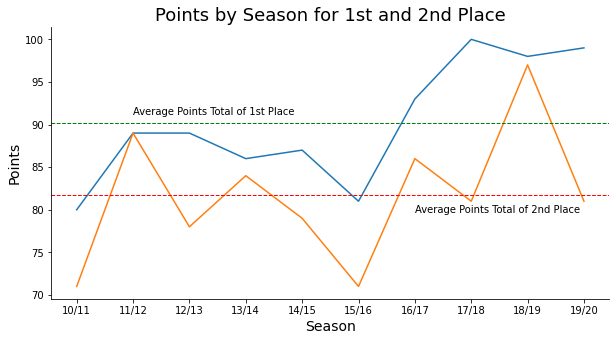

In [99]:
x = points_df.columns
mean1 = points_df.iloc[0].mean()
mean2 = points_df.iloc[1].mean() 
fig, ax = plt.subplots(figsize = (10,5)) 
ax.plot(x, points_df.iloc[0]) 
ax.plot(x, points_df.iloc[1])  
ax.axhline(mean1, color = 'g', linestyle = 'dashed', linewidth = 1) # Add line to show mean points
ax.axhline(mean2, color = 'r', linestyle = 'dashed', linewidth = 1) 
ax.set_title("Points by Season for 1st and 2nd Place", fontsize = 18)
ax.set_xlabel("Season", fontsize = 14)
ax.set_ylabel("Points", fontsize = 14)
ax.annotate('Average Points Total of 1st Place', # Annotate mean line
                xy = ('11/12', mean1+1))
ax.annotate('Average Points Total of 2nd Place', 
                xy = ('16/17', mean2-2))
ax.spines["top"].set_visible(False) # Done for better aesthetics
ax.spines["right"].set_visible(False) 

plt.show()

In [100]:
# Transpose and then melt the points DataFrame so that it is in a suitable form
# for a Seaborn boxplot
points_df2 = points_df.T
points_df2=pd.melt(points_df2)

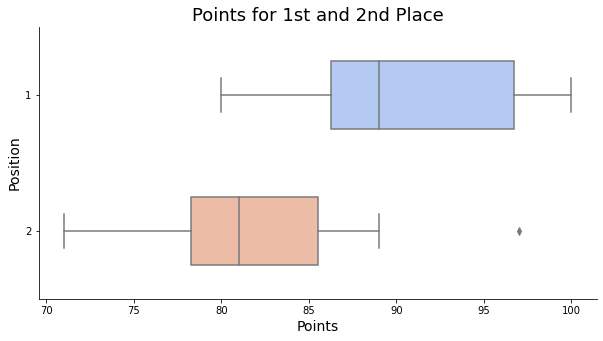

In [101]:
# Seaborn used here over standard matplotlib boxplot due to better presentation with Seaborn
fig, ax = plt.subplots(figsize = (10,5))
sns.boxplot(y=points_df2['Position'], x=points_df2['value'], orient='h',width=.5, palette="coolwarm")
ax.set_title("Points for 1st and 2nd Place", fontsize = 18)
ax.set_xlabel("Points", fontsize = 14)
ax.set_ylabel("Position", fontsize = 14)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

The graphs above reveal that that the team finishing in first place has, on all but two occasions, gained significantly more points than the team finishing second. It can also be seen that over the past five seasons, the number of points won by the first placed team is generally increasing.

A full discussion of the analysis can be found here: [5.1 Points Discussion](#5.1points)

### 4.2 Attack vs Defence

<a id='4.2goals'></a>

This section of the report looks at the relationship between goals scored, goals conceded, overall goal difference and final league position. For the seasons 2014/15 - 2019/20, expected goals for/against are also examined. Expected goals is a measure of how many goals a team should have scored, based on the perceived quality of a chance whenever a team has a shot. Similarly, expected goals against is how many goals a team should have conceded, based on the quality of the opposition's chance when shooting. A high value for expected goals means that a team is creating a lot of good chances. A low value for expected goals against means that a team is preventing the opposition from creating good chances. However, creating good chances and preventing good chances for the opposition is not sufficient on its own. If a team misses all of the good chances they create, or allow the opposition to score from so-called 'bad' chances, then they will inevitably suffer. Therefore, the difference between expected goals and actual goals scored, and between expected goals against and actual goals against is also considered.

For each of these variables the descriptive statistics and scatter plots are displayed to see if there is a correlation between the variable and a team's final league position. The descriptive statistics for the expected goals for/against (difference) DataFrames are also used to get average values for non-relegated teams. Next, the values are summed for all seasons and a DataFrame created showing the Pearson correlation for each variable. Finally, a function is created to examine how often the team in first place were the best performing team in the league in each of these categories.

[Note: The scatter plots throughout this report use an x-axis ranging from 20th place to 1st place, as visually more intuitive - as a team scores more goals, their league position improves. Pearson correlations are calculated using league position as a real number. As a result, the values present as negative where one would expect a positive correlation - as a team scores more goals, their position decreases (moves from 20 towards 1).]

In [102]:
# Create a new DataFrame with the just the goals for each season:

goalsfor_df = pd.concat(seasons_list, join='outer', axis=1)
goalsfor_df.drop(columns=['Points', 'HomeTeam', 'Goals Against', 'Yellow Cards',
       'Red Cards', 'Goal Difference'], inplace = True)

In [103]:
# Rename the columns to show the seasons:

goalsfor_df.columns = ['10/11', '11/12', '12/13', '13/14', '14/15', '15/16', '16/17', '17/18', '18/19', '19/20']

In [104]:
# Check that the table looks correct:

goalsfor_df.head(2)

,10/11,11/12,12/13,13/14,14/15,15/16,16/17,17/18,18/19,19/20
Position,,,,,,,,,,
1,78,93,86,102,73.0,68,85,106,95,85
2,60,89,66,101,83.0,65,86,68,89,102


Now the process is repeated for goals against

In [105]:
# Create a new DataFrame with the just the goals against for each season:

goalsagainst_df = pd.concat(seasons_list, join='outer', axis=1)
goalsagainst_df.drop(columns=['Points', 'HomeTeam', 'Goals For', 'Yellow Cards',
       'Red Cards', 'Goal Difference'], inplace = True)

In [106]:
# Rename the columns to show the seasons:

goalsagainst_df.columns = ['10/11', '11/12', '12/13', '13/14', '14/15', '15/16', '16/17', '17/18', '18/19', '19/20']

In [107]:
# Check that the table looks correct:

goalsagainst_df.head(2)

,10/11,11/12,12/13,13/14,14/15,15/16,16/17,17/18,18/19,19/20
Position,,,,,,,,,,
1,37,29,43,37,32.0,36,33,27,23,33
2,33,33,34,50,38.0,36,26,28,22,35


And again for goal difference.

In [108]:
# Create a new DataFrame with the just the goal difference for each season:

goaldiff_df = pd.concat(seasons_list, join='outer', axis=1)
goaldiff_df.drop(columns=['Points', 'HomeTeam', 'Goals For', 'Goals Against',
                          'Yellow Cards', 'Red Cards',], inplace = True)

In [109]:
# Rename the columns to show the seasons:

goaldiff_df.columns = ['10/11', '11/12', '12/13', '13/14', '14/15', '15/16', '16/17', '17/18', '18/19', '19/20']

In [110]:
# Check that the table looks correct:

goaldiff_df.head(2)

,10/11,11/12,12/13,13/14,14/15,15/16,16/17,17/18,18/19,19/20
Position,,,,,,,,,,
1,41,64,43,65,41.0,32,52,79,72,52
2,27,56,32,51,45.0,29,60,40,67,67


In [111]:
goalsfor_df.T.describe()

Position,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000
mean,87.100000,80.900000,71.200000,68.700000,64.600000,59.900000,55.10000,52.200000,46.600000,47.100000,47.600000,46.900000,42.70000,42.400000,42.000000,39.700000,40.50000,39.900000,36.000000,32.200000
std,12.169634,15.234829,4.848826,9.345825,7.471427,6.657494,10.37572,5.573748,4.742245,5.665686,7.515909,4.840799,7.91693,6.022181,4.346135,6.617317,5.08265,8.089087,6.928203,7.146095
min,68.000000,60.000000,63.000000,49.000000,55.000000,52.000000,36.00000,44.000000,41.000000,39.000000,33.000000,39.000000,34.00000,31.000000,34.000000,28.000000,31.00000,28.000000,27.000000,22.000000
25%,79.750000,66.500000,69.000000,66.250000,58.750000,55.000000,50.25000,48.250000,43.500000,43.500000,44.250000,44.000000,38.00000,39.750000,39.250000,37.250000,37.75000,34.250000,29.500000,27.500000
50%,85.500000,84.500000,71.000000,68.500000,64.000000,59.000000,52.50000,53.500000,46.000000,46.000000,47.500000,46.500000,40.00000,44.500000,41.500000,39.500000,41.00000,38.500000,36.500000,30.500000
75%,94.500000,89.000000,74.000000,72.000000,70.000000,64.000000,63.50000,54.750000,48.000000,50.000000,51.750000,50.750000,46.25000,46.000000,45.000000,45.000000,43.00000,45.500000,39.750000,38.000000
max,106.000000,102.000000,80.000000,84.000000,77.000000,74.000000,71.00000,63.000000,56.000000,59.000000,59.000000,54.000000,56.00000,50.000000,49.000000,49.000000,48.00000,55.000000,48.000000,43.000000


In [112]:
goalsagainst_df.T.describe()

Position,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,33.000000,33.500000,36.900000,40.700000,45.000000,45.10000,42.400000,51.500000,51.700000,52.900000,57.700000,54.000000,55.900000,55.200000,60.100000,59.900000,61.100000,68.800000,66.800000,71.100000
std,5.715476,7.604823,5.566766,5.313505,5.333333,7.18718,4.812022,7.199537,6.183311,7.078135,6.992853,5.077182,7.894442,8.363944,6.063552,5.566766,5.566766,8.740709,11.923832,7.823753
min,23.000000,22.000000,27.000000,35.000000,38.000000,29.00000,33.000000,43.000000,40.000000,39.000000,48.000000,47.000000,45.000000,46.000000,51.000000,53.000000,53.000000,51.000000,53.000000,56.000000
25%,29.750000,29.250000,35.250000,37.250000,41.000000,41.75000,40.000000,46.500000,48.500000,51.000000,52.000000,52.000000,51.000000,48.000000,55.250000,55.500000,56.750000,65.000000,56.500000,69.250000
50%,33.000000,33.500000,36.000000,40.000000,45.000000,46.50000,43.000000,49.500000,52.500000,52.000000,58.500000,53.500000,54.500000,52.500000,60.000000,59.500000,61.000000,68.500000,65.500000,73.500000
75%,36.750000,35.750000,39.000000,41.750000,49.750000,50.25000,44.750000,55.500000,55.000000,55.750000,60.750000,56.000000,57.750000,62.500000,62.750000,64.250000,66.000000,76.000000,76.750000,75.750000
max,43.000000,50.000000,49.000000,54.000000,53.000000,54.00000,51.000000,67.000000,60.000000,66.000000,71.000000,63.000000,70.000000,69.000000,70.000000,68.000000,68.000000,80.000000,85.000000,82.000000


In [113]:
goaldiff_df.T.describe()

Position,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,54.100000,47.400000,34.300000,28.000000,19.600000,14.800000,12.700000,0.700000,-5.100000,-5.800000,-10.100000,-7.100000,-13.200000,-12.800000,-18.100000,-20.200000,-20.600000,-28.900000,-30.800000,-38.900000
std,15.351077,15.152558,6.412661,9.556847,9.991107,7.052186,9.661493,9.226171,6.244108,7.284687,7.171704,4.794673,5.573748,8.011103,5.021067,5.329165,5.125102,7.622336,8.443275,10.159287
min,32.000000,27.000000,24.000000,14.000000,5.000000,4.000000,-3.000000,-14.000000,-14.000000,-16.000000,-17.000000,-15.000000,-20.000000,-22.000000,-25.000000,-30.000000,-28.000000,-43.000000,-47.000000,-54.000000
25%,41.500000,34.000000,31.000000,25.000000,11.750000,11.750000,7.000000,-3.750000,-7.750000,-10.750000,-15.750000,-10.000000,-16.500000,-19.750000,-22.250000,-22.750000,-24.500000,-33.750000,-30.000000,-47.250000
50%,52.000000,48.000000,35.500000,27.500000,22.000000,15.000000,12.500000,1.500000,-7.000000,-6.000000,-12.000000,-7.500000,-13.500000,-13.500000,-19.500000,-20.500000,-21.000000,-28.500000,-28.000000,-41.000000
75%,64.750000,59.000000,37.500000,33.500000,25.500000,18.750000,20.250000,8.000000,-3.250000,-1.000000,-7.000000,-3.250000,-11.000000,-6.750000,-13.500000,-16.000000,-16.750000,-23.500000,-26.500000,-30.250000
max,79.000000,67.000000,44.000000,46.000000,33.000000,25.000000,28.000000,13.000000,7.000000,6.000000,4.000000,0.000000,-1.000000,-1.000000,-11.000000,-13.000000,-13.000000,-18.000000,-21.000000,-25.000000


In [114]:
# Create a function to plot multiple scatter plots on one figure:

def multiple_scatter_plots(data, xlabel, ylabels, titles, fsize, xdim, ydim):
    """Plot multiple scatter plots on one figure.
    
    Parameters
    ----------
    data = a list of Pandas DataFrames
    xlabel = a single label for all x-axes
    ylabels = a list of labels for each y-axis
    titles = a list of titles for each plot
    fsize = size of the figure
    xdim = number of plots on the x-axis of the figure
    ydim = number of plots on the y-axis of the figure
    
    Returns
    -------
    A figure with (xdim x ydim) scatter plots"""
    fig = plt.figure(figsize=(fsize))
    for n in range(0,len(data)):
        ax = fig.add_subplot(ydim,xdim,n+1) #Rotate through subplots
        for column in data[n]:
            ax.scatter(data[n].index, data[n][column].values)
            ax.set_title(titles[n], fontsize = 18)
            ax.set_xlabel(xlabel, fontsize = 14)
            ax.set_ylabel(ylabels[n], fontsize = 14)
        ax.spines["top"].set_visible(False) # Remove borders for better presentation
        ax.spines["right"].set_visible(False) 
        ax.set_xticks([1,5,10,15,20])
        ax.set_xlim(21,0)
    plt.tight_layout() # Increase space between plots for better visibility
    plt.show()

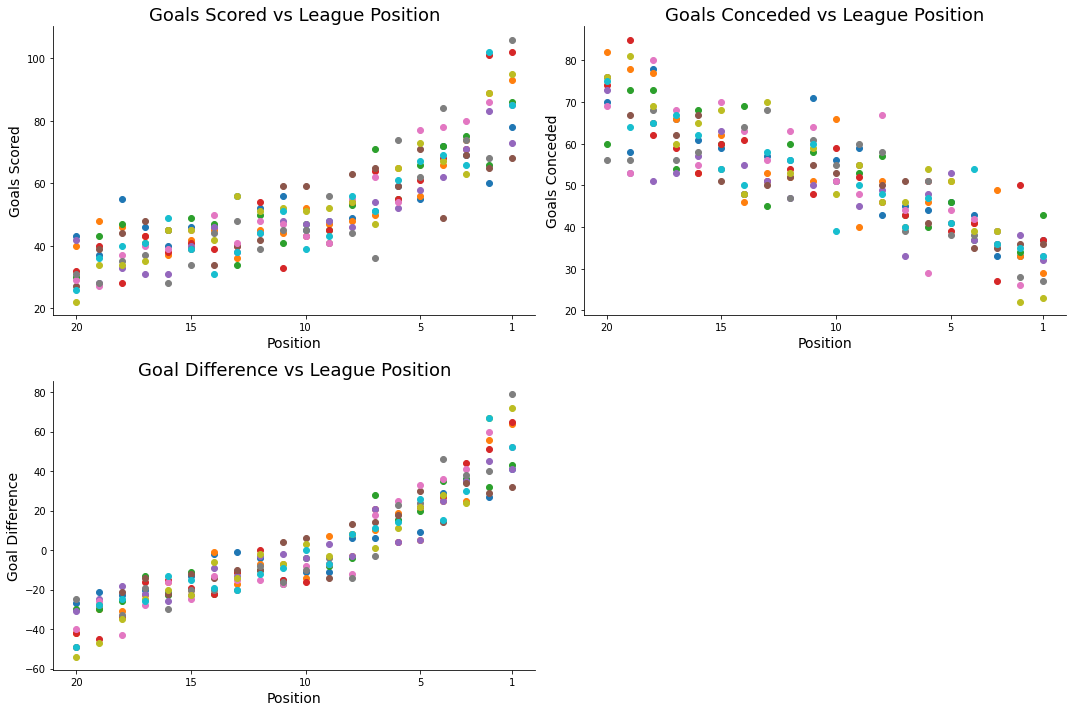

In [115]:
multiple_scatter_plots([goalsfor_df, goalsagainst_df, goaldiff_df], "Position",
                       ["Goals Scored", "Goals Conceded", "Goal Difference"],
                       ["Goals Scored vs League Position", "Goals Conceded vs League Position",
                        "Goal Difference vs League Position"], (15,10), 2, 2)

For the expected goals data, the separate DataFrames for each season must be combined and summed. This combined table is then split according to the value being measured.

In [116]:
# Create a list of the DataFrames in order to join them:

xGdf_list = [xGdf1415, xGdf1516, xGdf1617, xGdf1718, xGdf1819, xGdf1920]

In [117]:
# Create a new DataFrame with the expected goals values for all seasons:

xGdf = pd.concat(xGdf_list, join='outer', axis=1)
xGdf.drop(columns=['team'], inplace = True)

In [118]:
# Check that the table looks correct:

xGdf.head()

,xG,xG_diff,xGA,xGA_diff,xG,xG_diff,xGA,xGA_diff,xG,xG_diff,...,xGA,xGA_diff,xG,xG_diff,xGA,xGA_diff,xG,xG_diff,xGA,xGA_diff
position,,,,,,,,,,,,,,,,,,,,,
1,68.643320,-4.356680,31.524344,-0.475656,68.416034,0.416034,45.019954,9.019954,61.796887,-23.203113,...,24.511918,-2.488082,93.720559,-1.279441,25.732604,2.732604,75.193370,-9.806630,39.572898,6.572898
2,75.815441,-7.184559,40.499403,2.499403,73.530928,8.530928,33.857479,-2.142521,70.065979,-15.934021,...,43.540152,15.540152,79.457540,-9.542460,29.145105,7.145105,102.205233,0.205233,36.997629,1.997629
3,69.802591,-1.197409,35.718825,-0.281175,63.419362,-5.580638,37.080929,2.080929,79.851438,-0.148562,...,35.859433,-0.140567,63.968004,0.968004,38.107687,-0.892313,66.186663,0.186663,38.059164,2.059164
4,54.206860,-7.793140,39.842347,2.842347,45.424211,-3.575789,39.655822,4.655822,66.632558,-11.367442,...,35.751621,-2.248379,61.746657,-5.253343,49.146068,10.146068,76.227787,7.227787,41.088300,-12.911700
5,52.385284,-5.614716,57.044148,4.044148,66.197360,-4.802640,37.469231,-3.530769,63.581257,-13.418743,...,34.034714,-3.965286,64.795372,-8.204628,57.297488,6.297488,61.017165,-5.982835,47.894043,6.894043


In [119]:
# Split the tables depending on the variable:

xGdf_xG = xGdf["xG"]
xGdf_xGdiff = xGdf["xG_diff"]
xGdf_xGA = xGdf["xGA"]
xGdf_xGAdiff = xGdf["xGA_diff"]

In [120]:
# Rename the columns to show the seasons:

cols_to_use = ['14/15', '15/16', '16/17', '17/18', '18/19', '19/20']

xGdf_xG.columns = cols_to_use
xGdf_xGdiff.columns = cols_to_use
xGdf_xGA.columns = cols_to_use
xGdf_xGAdiff.columns = cols_to_use

In [121]:
xGdf_xG.T.describe()

position,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,76.534052,76.686422,68.689992,63.620532,61.189521,59.229721,49.842179,48.946482,47.744571,50.359573,45.513588,49.286866,39.895319,45.411704,41.934715,39.822891,39.592011,38.553801,37.749377,34.649612
std,13.149419,14.315800,6.036694,12.517801,5.009221,9.284738,8.579277,5.484630,2.915421,4.846303,7.420632,4.159559,3.269412,8.244010,3.727853,7.755616,3.563426,5.832504,6.122712,6.748395
min,61.796887,59.043412,63.419362,45.424211,52.385284,49.021303,32.771712,40.901235,42.626573,44.756683,38.213618,44.625608,36.491737,34.447956,37.214416,32.133843,35.591734,32.791033,29.713085,26.527059
25%,68.472855,70.932216,64.522669,56.091809,59.624808,52.823321,50.489013,45.284667,46.685580,46.420105,39.966946,45.634644,37.257930,41.165320,39.680004,33.890643,37.132439,34.568184,32.994468,30.307617
50%,71.918345,74.673184,67.549278,64.189608,62.299211,56.886482,53.641336,50.419176,48.653711,50.179855,43.339547,49.258094,39.269190,45.625050,41.364528,37.480198,38.981662,37.179960,39.280071,34.704041
75%,87.373951,78.547015,69.579917,73.828980,64.491843,65.855963,54.356421,53.105155,49.824815,53.888328,50.471968,52.943149,42.377390,47.616658,44.182829,46.478294,41.539403,40.728710,41.809560,36.721731
max,93.720559,102.205233,79.851438,77.485119,66.197360,72.269335,54.965667,54.365662,50.288714,56.749704,56.496626,53.981072,44.340833,58.812899,47.424061,49.671325,45.088989,48.562637,44.671045,45.726091


In [122]:
xGdf_xGA.T.describe()

position,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,32.496773,36.303617,35.738926,40.522748,46.801817,44.889644,45.435437,53.146007,52.220872,50.000415,57.292124,50.681312,56.641354,55.359534,58.117422,56.184029,57.699361,60.960451,61.805897,62.955191
std,8.153488,5.177654,3.175047,4.623829,9.658427,8.666475,7.188918,8.658374,7.828366,6.134805,6.268247,3.184745,5.856735,4.406674,6.650381,6.712527,8.787251,8.904495,6.433054,7.949532
min,24.511918,29.145105,29.607516,35.751621,34.034714,31.623915,37.389274,37.882860,43.084681,44.626242,47.900151,46.182073,51.304373,50.031654,51.014275,49.706256,46.555427,46.992957,55.301360,48.993914
25%,26.454183,33.800820,35.753977,38.153202,39.869743,39.760193,40.007964,50.856285,47.612677,44.853030,54.373815,48.804450,52.325760,52.447932,52.975113,52.767551,52.415432,56.449324,58.149294,60.572819
50%,30.071632,35.427554,36.470181,39.749085,47.482660,46.518462,44.237139,55.719371,51.598973,48.763411,56.997353,50.841993,55.647014,55.186654,56.749825,53.592435,57.059420,62.534549,60.382105,65.463043
75%,37.560760,39.623960,37.814605,40.776812,54.756622,51.411472,50.563414,56.924942,54.222244,53.162066,61.818911,52.721305,58.163025,57.142207,63.951208,57.945963,61.559164,66.262621,62.929160,66.811394
max,45.019954,43.540152,38.107687,49.146068,57.297488,54.127111,55.478657,62.992387,65.662023,59.671571,64.932490,54.748804,67.029351,62.423162,66.122065,68.323322,71.595382,71.774424,73.586610,71.607557


In [123]:
xGdf_xGdiff.T.describe()

position,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,-8.799281,-5.480244,-1.810008,-4.546135,-6.810479,-1.603612,-2.657821,-4.053518,0.911238,2.359573,-0.653079,2.286866,-2.438014,1.911704,1.601382,0.156225,1.092010,2.053801,5.082710,5.149612
std,8.977140,8.595467,2.821464,6.340602,3.675030,5.741403,7.501683,3.277651,5.841622,5.988429,4.173826,5.946580,4.907305,3.475206,4.660161,4.400780,5.415808,7.026769,4.216737,3.873780
min,-23.203113,-15.934021,-5.580638,-11.367442,-13.418743,-11.978697,-12.367546,-8.634338,-5.711286,-4.520281,-5.008140,-5.018928,-11.198670,-4.597330,-5.500457,-6.294162,-7.482828,-6.394340,0.187494,-0.472941
25%,-13.376049,-9.395992,-4.115432,-7.473575,-7.649180,-2.531463,-8.756647,-5.158028,-3.464455,-1.403950,-4.100126,-2.423320,-3.266713,1.937172,-0.138742,-2.791803,-2.049233,-2.422623,2.267345,3.840669
50%,-7.081655,-8.070574,-0.672986,-5.884112,-5.798776,-1.016720,-1.131310,-5.041315,-0.056415,1.179855,-1.153906,2.633887,-1.798806,2.509650,1.717901,1.085892,3.058428,0.772646,4.300586,4.704041
75%,-2.048751,-1.642215,0.102857,-3.995177,-5.005659,2.602826,2.659403,-1.465333,5.166814,5.420105,1.948812,6.561918,0.093731,3.289191,3.434357,3.626050,4.682358,6.265860,7.634159,6.557617
max,0.416034,8.530928,0.968004,7.227787,-2.839311,3.617498,6.058692,-0.133866,8.984122,11.749704,5.496626,9.710143,3.199637,5.752870,8.424061,4.671325,6.446153,12.562637,11.372649,11.234175


In [124]:
xGdf_xGAdiff.T.describe()

position,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,1.830106,5.470284,-1.094408,-0.310586,2.135150,-0.110356,3.268770,0.146007,0.054205,-1.666252,2.292125,-2.152021,0.308020,-2.973799,-1.882578,-6.649304,-1.133973,-5.206216,-0.694103,-7.878142
std,5.244895,6.138261,4.254359,8.034787,4.770968,5.856333,6.121611,7.922036,7.353150,7.564950,5.185563,4.830470,9.084109,8.306432,6.251427,7.616063,4.919669,3.002828,6.055083,5.008456
min,-4.381081,-2.142521,-9.392484,-12.911700,-3.965286,-9.750279,-3.308706,-12.117140,-10.641277,-8.373758,-3.407427,-7.331274,-11.695627,-12.968346,-11.985725,-15.381986,-9.444573,-9.576940,-8.069393,-16.990427
25%,-1.984976,2.123073,-0.739528,-3.822848,-1.880258,-2.115965,-1.512299,-3.631767,-3.849010,-5.218834,-1.916329,-6.045765,-6.760473,-9.408316,-4.122238,-11.596904,-2.746241,-7.287154,-5.986456,-8.538848
50%,1.128474,4.822254,-0.210871,0.296984,3.557713,0.462053,3.130820,0.402781,0.690290,-3.842922,2.783360,-2.034562,2.300018,-3.092361,-1.397067,-6.511015,-0.633506,-4.239465,0.297852,-7.371764
75%,5.612825,7.622726,1.509231,4.202453,5.734153,3.124686,5.704804,6.034675,3.387083,-1.937902,4.201501,-0.209585,7.459147,3.300664,1.225113,-5.019951,1.913763,-2.874385,4.241982,-4.295854
max,9.019954,15.540152,2.080929,10.146068,6.894043,7.127111,13.156891,9.252266,10.662023,13.042457,10.402133,5.472364,9.545492,7.392237,6.415849,6.323322,4.595382,-2.459016,5.833604,-3.336472


In [125]:
# Calculate mean values for both metrics without including relegated teams:

print("Average expected goals for (difference) for non-relegated teams: {}."
      .format(xGdf_xGdiff.T.describe().loc['mean',1:17].mean()))
print("Average expected goals against (difference) for non-relegated teams: {}."
      .format(xGdf_xGAdiff.T.describe().loc['mean',1:17].mean()))

Average expected goals for (difference) for non-relegated teams: -1.6784231254901947.
Average expected goals against (difference) for non-relegated teams: -0.1452122735294114.


In [126]:
# Original function modified to include a dashed line where y = 0,
# in order to easily identify positive and negative values:

def multiple_scatter_plots2(data, xlabel, ylabels, titles, fsize, xdim, ydim):
    """Plot multiple scatter plots on one figure. Include a dashed line at
    the point y = 0 for any subplots beyond the first two. 
    
    Parameters
    ----------
    data = a list of Pandas DataFrames
    xlabel = a single label for all x-axes
    ylabels = a list of labels for each y-axis
    titles = a list of titles for each plot
    fsize = size of the figure
    xdim = number of plots on the x-axis of the figure
    ydim = number of plots on the y-axis of the figure
    
    Returns
    -------
    A figure with (xdim x ydim) scatter plots"""
    fig = plt.figure(figsize=(fsize))
    for n in range(0,len(data)):
        ax = fig.add_subplot(ydim,xdim,n+1)
        for column in data[n]:
            ax.scatter(data[n].index, data[n][column].values)
            ax.set_title(titles[n], fontsize = 18)
            ax.set_xlabel(xlabel, fontsize = 14)
            ax.set_ylabel(ylabels[n], fontsize = 14)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        if n>1:
            ax.axhline(y=0, color='k', linestyle = 'dashed', linewidth = 1)
        ax.set_xticks([1,5,10,15,20])
        ax.set_xlim(21,0)
    plt.tight_layout()
    plt.show()

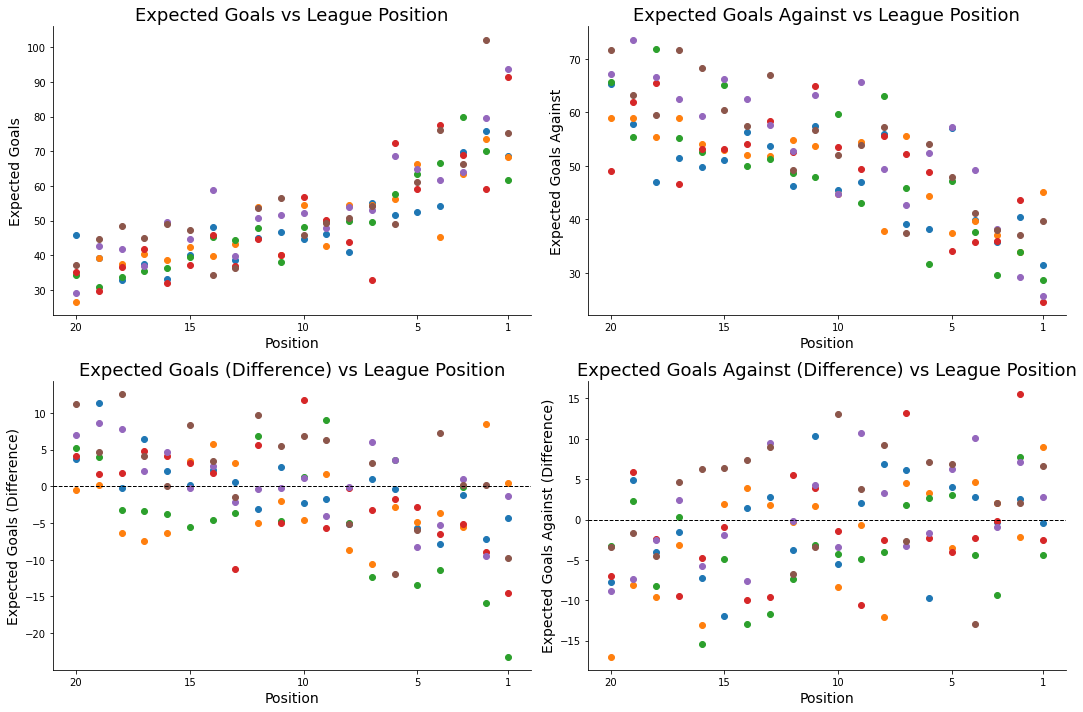

In [127]:
multiple_scatter_plots2([xGdf_xG, xGdf_xGA, xGdf_xGdiff, xGdf_xGAdiff],"Position",
                     ["Expected Goals", "Expected Goals Against",
                      "Expected Goals (Difference)",
                      "Expected Goals Against (Difference)"],
                     ['Expected Goals vs League Position',
                      'Expected Goals Against vs League Position',
                      'Expected Goals (Difference) vs League Position',
                      'Expected Goals Against (Difference) vs League Position'],
                        (15,10), 2,2)

In [128]:
# Create a new DataFrame with the total values for each measurement in order to look at correlation:

goalsmetrics_df = pd.DataFrame()
goalsmetrics_df['For'] = goalsfor_df.sum(axis=1)
goalsmetrics_df['Against'] = goalsagainst_df.sum(axis=1)
goalsmetrics_df['Difference'] = goaldiff_df.sum(axis=1)
goalsmetrics_df['Expected For'] = xGdf_xG.sum(axis=1)
goalsmetrics_df['Expected Against'] = xGdf_xGA.sum(axis=1)
goalsmetrics_df['Expected For (Difference)'] = xGdf_xGdiff.sum(axis=1)
goalsmetrics_df['Expected Against (Difference)'] = xGdf_xGAdiff.sum(axis=1)

In [129]:
goalsmetrics_df.reset_index(inplace=True)

In [130]:
goalsmetrics_df.corr()

,Position,For,Against,Difference,Expected For,Expected Against,Expected For (Difference),Expected Against (Difference)
Position,1.000000,-0.939001,0.974601,-0.967430,-0.937492,0.943915,0.848384,-0.718109
For,-0.939001,1.000000,-0.943977,0.989877,0.985319,-0.961729,-0.860319,0.658699
Against,0.974601,-0.943977,1.000000,-0.981259,-0.943420,0.973786,0.827705,-0.709192
Difference,-0.967430,0.989877,-0.981259,1.000000,0.981065,-0.980351,-0.858312,0.689617
Expected For,-0.937492,0.985319,-0.943420,0.981065,1.000000,-0.968168,-0.788459,0.626727
Expected Against,0.943915,-0.961729,0.973786,-0.980351,-0.968168,1.000000,0.771910,-0.590341
Expected For (Difference),0.848384,-0.860319,0.827705,-0.858312,-0.788459,0.771910,1.000000,-0.674709
Expected Against (Difference),-0.718109,0.658699,-0.709192,0.689617,0.626727,-0.590341,-0.674709,1.000000


In [131]:
# Function to return some data on first place, to be used in the discussion section:

def first_place_max(dataframe):
    """Counts the number of times the maximum value in each DataFrame column
    is found in the first row of the DataFrame"""
    count = 0
    for column in dataframe.columns:
        if dataframe[column].max() == dataframe[column][1]:
            count+=1
    return count

In [132]:
def first_place_min(dataframe):
    """Counts the number of times the minimum value in each DataFrame column
    is found in the first row of the DataFrame"""
    count = 0
    for column in dataframe.columns:
        if dataframe[column].min() == dataframe[column][1]:
            count+=1
    return count

In [133]:
# Use the above functions with the goals metrics DataFrames.

print("The team in first place scored the most goals {} out of the 10 seasons."
      .format(first_place_max(goalsfor_df)),'\n')
print("The team in first place conceded the least goals {} out of the 10 seasons."
      .format(first_place_min(goalsagainst_df)),'\n')
print("The team in first place had the best goal difference in {} out of the 10 seasons."
      .format(first_place_max(goaldiff_df)),'\n')
print("The team in first place had the highest number of expected goals {} out of the 6 seasons."
      .format(first_place_max(xGdf_xG)),'\n')
print("The team in first place had the lowest number of expected goals conceded {} out of the 6 seasons."
      .format(first_place_min(xGdf_xGA)))

The team in first place scored the most goals 6 out of the 10 seasons. 

The team in first place conceded the least goals 4 out of the 10 seasons. 

The team in first place had the best goal difference in 6 out of the 10 seasons. 

The team in first place had the highest number of expected goals 2 out of the 6 seasons. 

The team in first place had the lowest number of expected goals conceded 4 out of the 6 seasons.


Perhaps unsurprisingly, the majority of the goals metrics show a strong correlation (positive or negative depending on the measure) with league position. The correlation between the expected goals difference/expected goals against difference and league position is weaker, though this is understandable given the meaning behind this measurement. For a full discussion of the results see: [5.2 Goals Discussion](#5.2goals)

### 4.3 Is Timing Everything?

<a id='4.3timing'></a>

To analyse the importance of the timing of goals, descriptive statistics and histograms are utilised. Histograms are plotted to show the distribution of goals scored and goals conceded by teams finishing in the top three and bottom three positions in the league. Because the data is already grouped in bins depending on the time a goal was scored, the histograms are created using Matplotlib's simple bar plot function.

In [134]:
timesfor_df.describe()

,0-15,16-30,31-45,46-60,61-75,76-90
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,50.600000,60.600000,73.100000,67.150000,71.450000,92.300000
std,18.411667,22.880467,23.999781,21.101946,20.554101,29.522694
min,27.000000,30.000000,37.000000,36.000000,45.000000,53.000000
25%,41.000000,44.000000,59.750000,52.750000,55.000000,68.500000
50%,47.500000,55.000000,64.000000,58.000000,64.000000,91.500000
75%,56.500000,69.000000,78.750000,80.750000,86.500000,102.750000
max,109.000000,107.000000,128.000000,108.000000,113.000000,149.000000


In [135]:
# Print some statistics concerning last place:

print("Last place mean goals conceded: {}.".format(timesagainst_df.iloc[19].mean()))
print("Last place max goals conceded: {}.".format(timesagainst_df.iloc[19].max()))
print("Last place median goals conceded: {}.".format(timesagainst_df.iloc[19].median()))

Last place mean goals conceded: 93.16666666666667.
Last place max goals conceded: 142.
Last place median goals conceded: 87.0.


In [136]:
# Create a function to plot the distribution of goals by match time:

def histograms(data,xlabel,ylabel,titles,fsize,xdim,ydim,positions,colour):
    """Plot multiple bar charts on one figure.
    
    Parameters
    ----------
    data = a single Pandas DataFrames
    xlabel = a single label for all x-axes
    ylabels = a single label for all y-axes
    titles = a list of titles for each plot
    fsize = size of the figure
    xdim = number of plots on the x-axis of the figure
    ydim = number of plots on the y-axis of the figure
    positions = a list of the league positions to be plotted
    colour = colour to use for bars
    
    Returns
    -------
    A figure with (xdim x ydim) bar plots"""    
    fig = plt.figure(figsize=(fsize))
    for n in range(0,len(positions)):
        ax = fig.add_subplot(ydim,xdim,n+1)
        ax.bar(data.columns, data.iloc[positions[n]-1],color=colour) 
        ax.set_title(titles[n], fontsize = 18)
        ax.set_xlabel(xlabel, fontsize = 14)
        ax.set_ylabel(ylabel, fontsize = 14)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        plt.xticks(rotation=70)
    plt.tight_layout()
    plt.show()

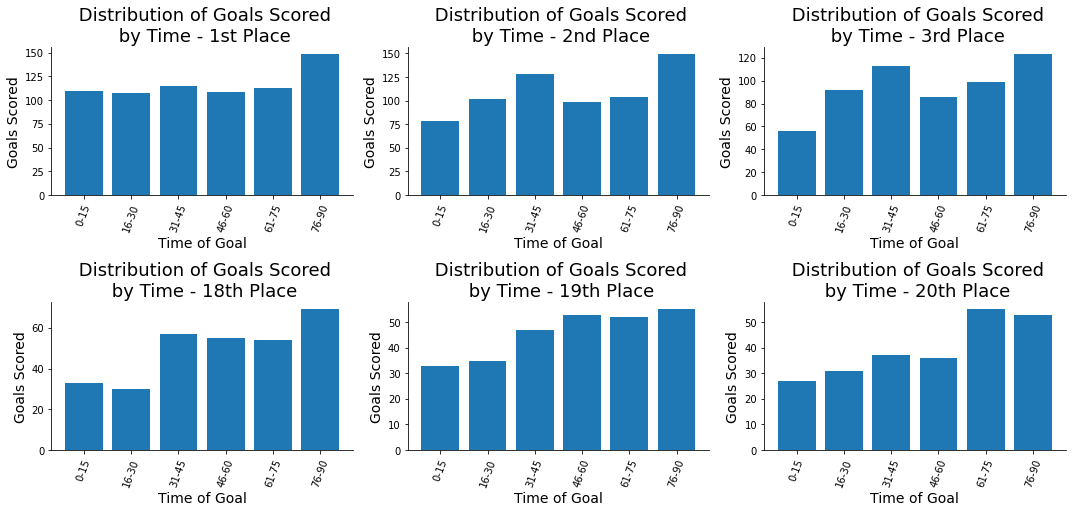

In [137]:
histograms(timesfor_df, "Time of Goal", 'Goals Scored',
           [" Distribution of Goals Scored\n by Time - 1st Place",
            " Distribution of Goals Scored\n by Time - 2nd Place",
            " Distribution of Goals Scored\n by Time - 3rd Place",
            " Distribution of Goals Scored\n by Time - 18th Place",
            " Distribution of Goals Scored\n by Time - 19th Place",
            " Distribution of Goals Scored\n by Time - 20th Place",],
            (15,10), 3,3, [1,2,3,18,19,20],'tab:blue')

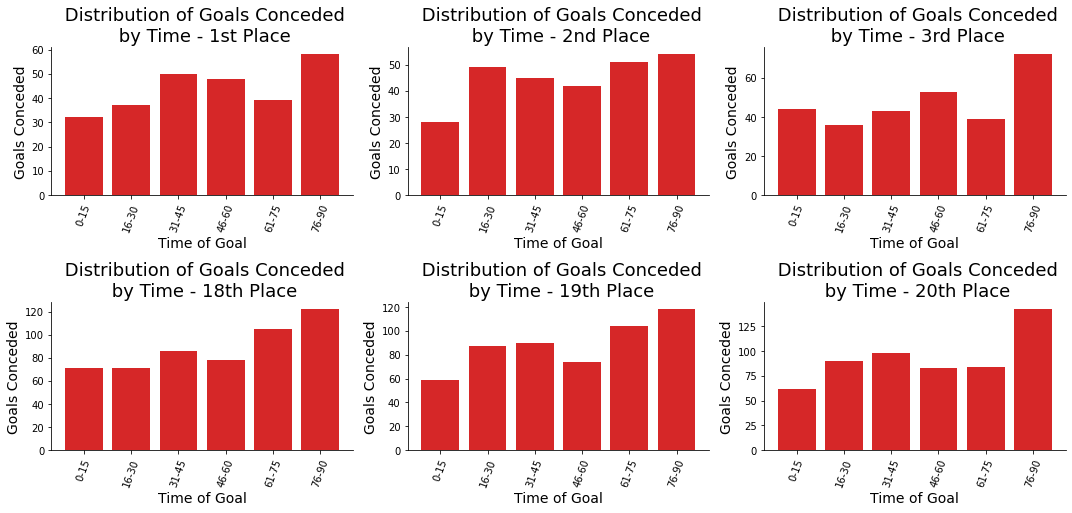

In [138]:
histograms(timesagainst_df, "Time of Goal", "Goals Conceded",
           [" Distribution of Goals Conceded\n by Time - 1st Place",
            " Distribution of Goals Conceded\n by Time - 2nd Place",
            " Distribution of Goals Conceded\n by Time - 3rd Place",
            " Distribution of Goals Conceded\n by Time - 18th Place",
            " Distribution of Goals Conceded\n by Time - 19th Place",
            " Distribution of Goals Conceded\n by Time - 20th Place",],
            (15,10), 3,3, [1,2,3,18,19,20],'tab:red')

The histograms show that, overall, teams tend to score more (and consequently concede more) goals in the final 15 minutes of a game. It does appear from the final histogram that teams finishing at the bottom of the league concede a larger proportion of goals in this final period. For a full discussion see: [5.3 Timing Discussion](#5.3timing)

### 4.4 The Value of Money

<a id='4.4finances'></a>

The report now looks at the correlation between a club's revenue/wage bill and their league position. These two features were chosen due to their accuracy (as mentioned above, the information comes, albeit indirectly, from the clubs' annual accounts) and on the basis that spending more on player wages should guarantee a higher quality of player, and that clubs with a higher revenue should have more spending power.

A notable factor that is not considered here is transfer fees. The main reason for this is a general lack of accuracy in such figures. More often than not, when a team purchases a player they choose not to disclose the amount paid. Further, due to the way that player purchases and sales are amortised in a club's books, these figures are not readily available from the filed accounts. Nevertheless, the media will usually reach a consensus on a transfer fee and this information is available online. Any future analysis may wish to use these estimated figures, but they are not employed here.

For the data that is being analysed, two DataFrames are created in generate descriptive statistics and scatter graphs to examine any trends and correlations.

In [139]:
# Create new DataFrames for revenue and wages:

turnover_df = pd.concat(finances_seasons_list, join='outer', axis=1)
turnover_df.drop(columns=['HomeTeam', 'Wages'], inplace = True)
turnover_df.columns = ['12/13', '13/14', '14/15', '15/16', '16/17', '17/18']

wages_df = pd.concat(finances_seasons_list, join='outer', axis=1)
wages_df.drop(columns=['HomeTeam', 'Turnover'], inplace = True)
wages_df.columns = ['12/13', '13/14', '14/15', '15/16', '16/17', '17/18']

In [140]:
# Remove '£' and 'm' and convert values to integers for analysis:

for column in turnover_df.columns:
    turnover_df[column]= turnover_df[column].str.replace('£', '')
    turnover_df[column]= turnover_df[column].str.replace('m', '')
    turnover_df[column]= turnover_df[column].astype(int)

In [141]:
# Repeat for wages:

for column in wages_df.columns:
    wages_df[column]= wages_df[column].str.replace('£', '')
    wages_df[column]= wages_df[column].str.replace('m', '')
    wages_df[column]= wages_df[column].astype(int)

In [142]:
# Check the DataFrame:

turnover_df.head()

,12/13,13/14,14/15,15/16,16/17,17/18
Position,,,,,,
1,363,347,319,129,368,500
2,271,256,352,354,306,590
3,260,324,345,210,473,381
4,283,304,395,515,364,455
5,147,121,196,392,427,448


In [143]:
# Display descriptive statistics for turnover by league position:

turnover_df.T.describe()

Position,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,337.666667,354.833333,332.166667,386.000000,288.500000,278.833333,200.833333,151.666667,122.333333,153.666667,121.833333,133.500000,113.833333,105.500000,112.333333,105.000000,108.166667,100.666667,96.000000,98.333333
std,119.909410,122.059685,92.285246,88.656641,149.645915,188.583580,118.019349,83.882457,38.244825,93.681731,37.785800,60.364725,37.785800,15.306861,24.646839,17.821336,27.549350,27.997619,25.830215,25.966645
min,129.000000,256.000000,210.000000,283.000000,121.000000,86.000000,114.000000,70.000000,91.000000,67.000000,75.000000,73.000000,67.000000,84.000000,72.000000,84.000000,76.000000,56.000000,59.000000,61.000000
25%,326.000000,279.750000,276.000000,319.000000,159.250000,138.250000,139.750000,104.500000,98.500000,109.000000,98.000000,97.500000,94.500000,99.000000,102.500000,90.000000,90.500000,86.500000,82.000000,83.750000
50%,355.000000,329.000000,334.500000,379.500000,294.000000,239.500000,156.500000,122.500000,102.000000,134.000000,124.000000,110.000000,105.500000,103.000000,116.000000,106.000000,104.500000,105.500000,94.500000,97.500000
75%,366.750000,353.500000,372.000000,440.000000,418.250000,376.750000,197.250000,176.500000,145.250000,147.000000,132.750000,163.750000,130.750000,113.750000,128.750000,119.750000,120.000000,123.750000,115.250000,121.000000
max,500.000000,590.000000,473.000000,515.000000,448.000000,581.000000,433.000000,302.000000,182.000000,335.000000,183.000000,233.000000,175.000000,128.000000,139.000000,125.000000,153.000000,127.000000,128.000000,126.000000


In [144]:
# Display descriptive statistics for wages by league position:

wages_df.T.describe()

Position,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,194.000000,198.166667,179.166667,204.500000,151.500000,152.833333,116.500000,104.166667,82.833333,102.500000,76.00000,82.000000,74.000000,72.666667,73.333333,62.166667,78.666667,64.000000,61.166667,78.833333
std,61.481705,61.336504,54.341206,40.849725,71.812951,84.108065,52.133483,60.237585,26.858270,63.525585,22.93469,18.825515,18.857359,9.667816,17.397318,13.044795,19.169420,17.854971,21.283014,14.851487
min,80.000000,127.000000,100.000000,154.000000,69.000000,63.000000,80.000000,54.000000,56.000000,49.000000,46.00000,63.000000,58.000000,57.000000,47.000000,43.000000,58.000000,44.000000,29.000000,53.000000
25%,187.000000,156.500000,155.750000,175.250000,97.250000,88.750000,82.750000,65.250000,62.500000,70.500000,57.75000,68.500000,61.000000,69.750000,66.250000,60.250000,67.500000,54.500000,50.750000,74.250000
50%,211.000000,194.500000,185.500000,205.500000,149.500000,133.000000,95.000000,77.500000,74.500000,78.500000,81.00000,77.500000,67.000000,73.000000,74.000000,61.500000,76.000000,58.500000,66.000000,81.000000
75%,220.000000,223.500000,192.000000,226.000000,198.750000,221.500000,125.250000,129.500000,104.500000,107.500000,92.25000,91.000000,81.250000,77.000000,80.250000,62.750000,82.250000,71.500000,68.500000,90.000000
max,260.000000,296.000000,264.000000,264.000000,246.000000,263.000000,215.000000,208.000000,119.000000,224.000000,102.00000,113.000000,107.000000,86.000000,99.000000,84.000000,113.000000,94.000000,91.000000,93.000000


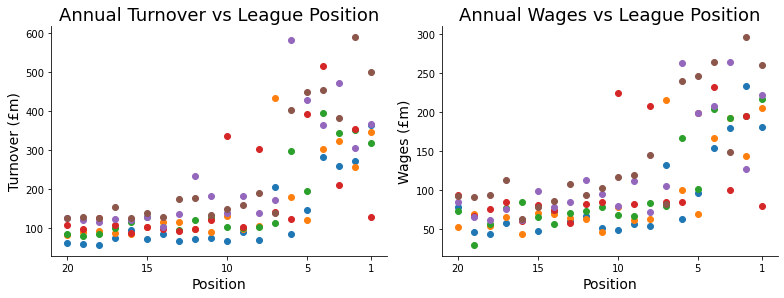

In [145]:
# Display the scatter plots:

multiple_scatter_plots([turnover_df, wages_df],"Position",
                     ["Turnover (£m)", "Wages (£m)"],
                     ["Annual Turnover vs League Position",
                      "Annual Wages vs League Position"],(11,4.25), 2,1)

In [146]:
# Create a new DataFrame with the total turnover by position in order to look at correlation:


turnovermetrics_df = pd.DataFrame()
turnovermetrics_df['Turnover'] = turnover_df.sum(axis=1)
turnovermetrics_df.reset_index(inplace=True)

In [147]:
turnovermetrics_df.corr()

,Position,Turnover
Position,1.000000,-0.888726
Turnover,-0.888726,1.000000


In [148]:
# Repeat for wages:

wagesmetrics_df = pd.DataFrame()
wagesmetrics_df['Wages'] = wages_df.sum(axis=1)
wagesmetrics_df.reset_index(inplace=True)

In [149]:
wagesmetrics_df.corr()

,Position,Wages
Position,1.000000,-0.893727
Wages,-0.893727,1.000000


The scatter plots and correlation tables show a clear correlation between a club's finances and their final league position. It is also observed that there is a big difference between clubs finishing in the top half of the table and those finishing in the bottom half of the table. See the following section for a full discussion of the analysis: [5.4 Finances Discussion](#5.4finances)

### 4.5 How important is discipline?

<a id='4.5discipline'></a>

To assess the importance of discipline, the report looks at the number of yellow and red cards given to a team each season. In order to properly analyse the information, the different cards are given a numerical weighting. A yellow card is considered to be worth 1 'aggression point', and a red card is 2.5 'aggression points'. The league tables crated in section 2.1 are used to create aggression scores for each league position. Descriptive statistics and correlation tables are then created to determine whether maintaining discipline results in success, or if in fact aggression is key to moving up the table.

It should be mentioned that yellow and red cards are not always given as a result of aggression. They may be awarded for simulation (diving), for an overzealous celebration, or a number of other reasons. Strictly speaking, such cards should not be included in an analysis of discipline. However, it would be challenging, time consuming and perhaps even impossible to discover the reason for every single red and yellow card awarded in the past 10 seasons. Given that the majority of cards awarded are related to a lack of discipline, this report does not attempt to distinguish cards in any way other than the different points assigned to yellow and red cards.

In [150]:
# Add column to league tables for aggression points:

for season in seasons_list:
        season['Aggression Points'] = season["Yellow Cards"] + (season["Red Cards"])*2.5

In [151]:
seasons_list[0].head(1)

,HomeTeam,Points,Goals For,Goals Against,Yellow Cards,Red Cards,Goal Difference,Aggression Points
Position,,,,,,,,
1,Man United,80,78,37,58,3,41,65.5


In [152]:
# Create a new DataFrame with the aggression points for each season:

cards_df = pd.concat(seasons_list, join='outer', axis=1)
cards_df.drop(columns=['Points', 'HomeTeam', 'Goals For', 'Goals Against',
                       'Yellow Cards', 'Red Cards', 'Goal Difference'], inplace = True)

In [153]:
cards_df.columns = ['10/11', '11/12', '12/13', '13/14', '14/15', '15/16', '16/17', '17/18', '18/19', '19/20']
cards_df.head()

,10/11,11/12,12/13,13/14,14/15,15/16,16/17,17/18,18/19,19/20
Position,,,,,,,,,,
1,65.5,68.5,59.5,74.5,87.0,55.5,72.0,63.0,46.5,40.5
2,86.5,53.5,70.5,56.5,82.0,49.0,62.0,66.5,42.0,70.0
3,61.5,77.0,59.5,63.5,73.0,72.0,81.0,54.0,49.0,72.0
4,83.0,52.5,56.5,63.0,76.5,67.5,54.0,46.5,63.5,60.0
5,56.0,72.0,58.0,56.5,89.0,61.0,74.5,51.0,77.0,48.5


In [154]:
cards_df.T.describe()

Position,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,63.250000,63.850000,66.250000,62.300000,64.35000,75.750000,67.700000,64.900000,70.700000,70.050000,66.55000,65.250000,74.950000,70.700000,68.350000,72.150000,75.400000,70.200000,67.700000,71.750000
std,13.630542,14.118644,10.371569,11.118553,13.08742,8.763085,5.779273,13.192591,9.052931,4.804223,13.68789,9.598177,7.847328,7.173253,12.671161,9.927655,12.094076,9.826834,11.628987,10.873643
min,40.500000,42.000000,49.000000,46.500000,48.50000,62.000000,59.000000,53.500000,61.000000,63.000000,45.00000,50.500000,62.500000,59.000000,48.000000,54.500000,67.000000,52.000000,47.500000,51.500000
25%,56.500000,54.250000,60.000000,54.625000,56.12500,69.000000,63.750000,58.500000,63.375000,66.625000,58.62500,58.375000,71.750000,66.375000,59.500000,65.500000,68.000000,65.125000,60.750000,65.375000
50%,64.250000,64.250000,67.750000,61.500000,59.50000,74.750000,66.750000,60.250000,67.750000,70.250000,62.75000,63.750000,74.250000,71.500000,68.750000,72.500000,69.750000,69.000000,68.750000,74.250000
75%,71.125000,70.375000,72.750000,66.500000,73.87500,82.500000,72.750000,67.625000,76.375000,72.625000,71.37500,72.375000,79.250000,76.000000,77.000000,78.375000,77.250000,77.375000,77.125000,80.500000
max,87.000000,86.500000,81.000000,83.000000,89.00000,89.500000,76.000000,98.500000,84.500000,80.000000,89.50000,79.500000,90.000000,81.500000,85.500000,87.500000,99.000000,86.000000,82.500000,86.000000


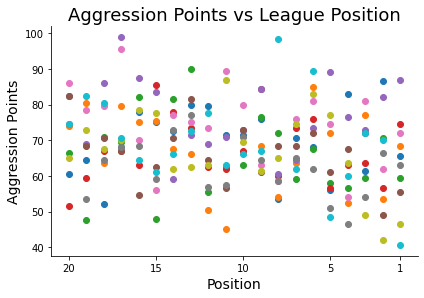

In [155]:
multiple_scatter_plots([cards_df],"Position", ["Aggression Points"],
                        ["Aggression Points vs League Position"],(6,4.25), 1,1)

In [156]:
aggressionmetrics_df = pd.DataFrame()
aggressionmetrics_df['Aggression'] = cards_df.sum(axis=1)
aggressionmetrics_df.reset_index(inplace=True)

In [157]:
aggressionmetrics_df.corr()

,Position,Aggression
Position,1.000000,0.572257
Aggression,0.572257,1.000000


There appears to be little correlation between the number of aggression points a team gains and their final position. However, this could be due to the initial weighting given to red and yellow cards. Alternatively, it could be that yellow cards, which can be awarded for a range of offences, have no bearing on success. Whereas red cards, which are typically awarded for more serious offences and come with more serious consequences (the removal of a player from the field) do have an impact. To determine whether this is the case, separate DataFrames are created for yellow and red cards and the results are plotted.

In [158]:
yellows_df = pd.concat(seasons_list, join='outer', axis=1)
yellows_df.drop(columns=['Points', 'HomeTeam', 'Goals For', 'Goals Against',
                         'Red Cards', 'Goal Difference', 'Aggression Points'], inplace = True)

reds_df = pd.concat(seasons_list, join='outer', axis=1)
reds_df.drop(columns=['Points', 'HomeTeam', 'Goals For', 'Goals Against',
                       'Yellow Cards', 'Goal Difference', 'Aggression Points'], inplace = True)

In [159]:
yellows_df.columns = ['10/11', '11/12', '12/13', '13/14', '14/15', '15/16', '16/17', '17/18', '18/19', '19/20']
reds_df.columns = ['10/11', '11/12', '12/13', '13/14', '14/15', '15/16', '16/17', '17/18', '18/19', '19/20']

In [160]:
yellows_df.T.describe()

Position,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,58.000000,58.100000,61.500000,55.300000,58.600000,67.500000,61.700000,57.900000,64.200000,61.800000,58.300000,59.500000,68.200000,65.200000,61.100000,64.400000,67.900000,62.200000,62.200000,65.000000
std,12.710451,13.186272,9.559754,8.957306,12.790622,8.631338,6.429965,10.979273,10.454133,8.038795,12.293178,8.618456,6.957011,9.354737,9.182713,7.290786,11.589746,8.256984,10.008885,9.521905
min,38.000000,37.000000,49.000000,44.000000,41.000000,57.000000,54.000000,48.000000,51.000000,52.000000,40.000000,48.000000,60.000000,49.000000,43.000000,52.000000,57.000000,47.000000,45.000000,49.000000
25%,50.000000,51.750000,53.000000,47.000000,51.500000,60.750000,57.000000,51.000000,56.500000,58.000000,53.250000,52.750000,61.750000,60.250000,56.000000,61.250000,62.000000,59.000000,57.000000,58.250000
50%,57.500000,61.000000,63.000000,55.000000,57.500000,66.000000,59.500000,54.500000,63.000000,59.000000,56.000000,60.000000,67.500000,63.000000,62.500000,66.500000,63.000000,63.500000,62.500000,65.500000
75%,68.500000,63.750000,70.250000,63.000000,67.000000,74.500000,65.750000,60.750000,71.750000,62.500000,64.500000,66.250000,73.500000,73.000000,67.500000,70.000000,67.750000,66.750000,68.000000,74.250000
max,77.000000,77.000000,72.000000,68.000000,79.000000,82.000000,72.000000,86.000000,82.000000,80.000000,77.000000,71.000000,80.000000,78.000000,75.000000,72.000000,94.000000,73.000000,76.000000,76.000000


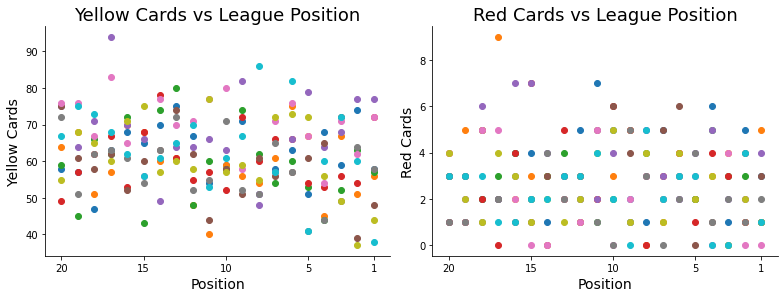

In [161]:
multiple_scatter_plots([yellows_df, reds_df],"Position", ["Yellow Cards", "Red Cards"],
                        ["Yellow Cards vs League Position", "Red Cards vs League Position"],(11,4.25), 2,1)

Although there still appears to be little correlation between the number of cards awarded and the position a team ultimately finishes in, the new scatter plot of red cards does reveal the fact that no team finishing in the top half of the table has received more than 6 red cards in a single season. For the full discussion of the results see section: [5.5 Discipline Discussion](#5.5discipline).

### 4.6 Home Advantage

<a id='4.6attendance'></a>

Home advantage is often mentioned in football, whether as a result of having more fans supporting the home team, the players' familiarity with their surroundings, the lack of travel for the home team, or a combination of all of these things. This report focuses on home advantage purely in terms of home crowd support, and whether the size of the crowd has an effect on a team's level of success. 

Again, the attendance data is combined into a single DataFrame for the purposes of analysis. In order to plot the scatter graph, the attendance values are first converted to integers.

In [162]:
# Create a new DataFrame with the average attendance for each season:

attendance_df = pd.concat(attendance_seasons_list, join='outer', axis=1)
attendance_df.drop(columns=['HomeTeam'], inplace = True)
attendance_df.columns = ['12/13', '13/14', '14/15', '15/16', '16/17', '17/18', '18/19']

In [163]:
# Remove the comma and convert values to integers:

for column in attendance_df.columns:
    attendance_df[column]= attendance_df[column].str.replace(',', '')
    attendance_df[column]= attendance_df[column].astype(int)

In [164]:
# Check for correctness:

attendance_df.head()

,12/13,13/14,14/15,15/16,16/17,17/18,18/19
Position,,,,,,,
1,75529,47080,41546,32020,41502,54054,54128
2,46963,44672,45411,59943,31639,74975,53050
3,41462,41481,59993,35807,54018,67952,40436
4,60079,60013,75335,75268,53016,53049,54216
5,36066,37731,35727,54020,59955,41281,59898


In [165]:
# Display descriptive statistics for attendance by league position:

attendance_df.T.describe()

Position,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,49408.428571,50950.428571,48735.571429,61568.000000,46382.571429,50954.285714,39468.000000,29853.428571,33760.714286,31067.571429,30730.0000,30100.714286,28774.714286,31977.571429,31202.285714,27823.142857,33393.571429,28654.714286,24322.857143,26658.428571
std,13893.933711,13671.072670,12010.199622,9845.620041,11150.908107,18739.036499,17453.190119,11675.402846,11247.569022,11023.325313,15150.0944,11039.330742,14372.344899,10273.160368,11035.855181,12369.939321,9012.329404,10162.203841,3802.890235,8650.972101
min,32020.000000,31639.000000,35807.000000,53016.000000,35727.000000,30750.000000,20688.000000,11182.000000,26137.000000,20370.000000,10620.0000,20406.000000,10531.000000,20230.000000,20534.000000,11188.000000,20571.000000,19359.000000,19042.000000,17748.000000
25%,41524.000000,45041.500000,40949.000000,53632.500000,36898.500000,36081.500000,30841.000000,22920.500000,27307.500000,24157.500000,22196.0000,23052.000000,22817.000000,24831.000000,22607.500000,22298.500000,27809.500000,22134.500000,22242.000000,20574.000000
50%,47080.000000,46963.000000,41481.000000,60013.000000,41281.000000,44658.000000,34906.000000,30211.000000,30936.000000,25062.000000,26671.0000,25440.000000,26722.000000,31692.000000,30402.000000,24116.000000,30793.000000,26805.000000,24336.000000,24519.000000
75%,54091.000000,56496.500000,57005.500000,67673.500000,56959.000000,66910.000000,41897.000000,38919.500000,33151.000000,36665.500000,38228.0000,33382.000000,30826.000000,35569.500000,36007.500000,32172.000000,41807.500000,30343.000000,25974.500000,30954.000000
max,75529.000000,74975.000000,67952.000000,75335.000000,59955.000000,75289.000000,75206.000000,43901.000000,58335.000000,50395.000000,56971.0000,51991.000000,56884.000000,51120.000000,50250.000000,50517.000000,43157.000000,49464.000000,30449.000000,41286.000000


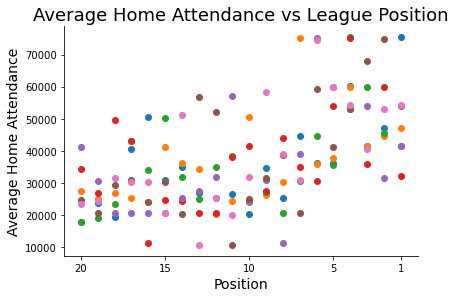

In [166]:
# Display a scatter plot of attendance against league position:

multiple_scatter_plots([attendance_df],"Position", ["Average Home Attendance"],
                        ["Average Home Attendance vs League Position"],(6,4.25), 1,1)

In [167]:
# Create a new DataFrame showing the total attendance over all seasons for each league position:

attendancemetrics_df = pd.DataFrame()
attendancemetrics_df['Attendance'] = attendance_df.sum(axis=1)
attendancemetrics_df.reset_index(inplace=True)

In [168]:
# Use new DataFrame to display the correlation between attendance and position:

attendancemetrics_df.corr()

,Position,Attendance
Position,1.000000,-0.843165
Attendance,-0.843165,1.000000


It can be seen from the correlation DataFrame that there is a correlation between attendance and league position. However, it is clear from the scatter plot that there is a large amount of variation, particularly when it comes to teams with high average attendance and relatively low league finishes.

A complete discussion can be found here: [5.6 Attendance Discussion](#5.6attendance) 

### 4.7 Does Location Matter?

<a id='4.7location'></a>

For the location analysis, three groups of teams are considered: league winners, qualifiers for the champions league (the top four teams in the league), and relegated teams. The analysis aims to see if success and failure are related to a team's geographical location.

To carry out the analysis, lists are created for each of the three groups and these lists are used to get the coordinates of each team's stadium. A map is then plotted with labelled markers for each team.

In [169]:
# Create a list of winners, champions league qualifiers, and relegated teams:

winners = []
for season in seasons_list:
    winners.append(season.loc[1,"HomeTeam"])
    
qualifiers = []
for season in seasons_list:
    for n in range(1,5):
        qualifiers.append(season.loc[n,"HomeTeam"])
        
relegated = []
for season in seasons_list:
    for n in range(18,21):
        relegated.append(season.loc[n,"HomeTeam"])

In [170]:
# Get longitude and latitude for winners:

winners_df = location_df[location_df['Team'].isin(winners)]

In [171]:
# Check that everything looks correct:

winners_df.head()

,Team,Latitude,Longitude
5,Liverpool,53.430801,-2.960960
131,Chelsea,51.481602,-0.191034


It can be seen at this point that only two teams from the list of league winners have been found in the location DataFrame. The likely reason for this is that the league tables used in this report do not use the full team names for all teams. Rather than trying to change the entire league table entries, the simplest step at this point is to rename the teams in the winners list using their full names.

In [172]:
#Check the wording of the winners list (showing only the unique values):

set(winners)

{'Chelsea', 'Leicester', 'Liverpool', 'Man City', 'Man United'}

In [173]:
# Replace the teams with the full names:

for index,item in enumerate(winners):
    if item == 'Man United':
        winners[index] = 'Manchester United'
    if item == 'Man City':
        winners[index] = 'Manchester City'
    if item == 'Leicester':
        winners[index] = 'Leicester City'

In [174]:
# Repeat the earlier step to get the coordinates:

winners_df = location_df[location_df['Team'].isin(winners)]

In [175]:
#Check that all teams have been matched:

winners_df

,Team,Latitude,Longitude
5,Liverpool,53.430801,-2.960960
46,Manchester City,53.483002,-2.200240
74,Leicester City,52.620300,-1.142170
97,Manchester United,53.463100,-2.291390
131,Chelsea,51.481602,-0.191034


In [176]:
# Repeat the process for the qualifiers:

set(qualifiers)

{'Arsenal',
 'Chelsea',
 'Leicester',
 'Liverpool',
 'Man City',
 'Man United',
 'Tottenham'}

In [177]:
for index,item in enumerate(qualifiers):
    if item == 'Man United':
        qualifiers[index] = 'Manchester United'
    if item == 'Man City':
        qualifiers[index] = 'Manchester City'
    if item == 'Leicester':
        qualifiers[index] = 'Leicester City'
    if item == 'Tottenham':
         qualifiers[index] = 'Tottenham Hotspur'

In [178]:
qualifiers_df = location_df[location_df['Team'].isin(qualifiers)]

In [179]:
# Instead of printing the entire DataFrame, can simply check that the length of
# the DataFrame matches the number of unique values in the list of qualifiers:

print(len(qualifiers_df), ":", len(set(qualifiers)))

7 : 7


In [180]:
# Repeat the process for the relegated teams:

set(relegated)

{'Aston Villa',
 'Birmingham',
 'Blackburn',
 'Blackpool',
 'Bolton',
 'Bournemouth',
 'Burnley',
 'Cardiff',
 'Fulham',
 'Huddersfield',
 'Hull',
 'Middlesbrough',
 'Newcastle',
 'Norwich',
 'QPR',
 'Reading',
 'Stoke',
 'Sunderland',
 'Swansea',
 'Watford',
 'West Brom',
 'West Ham',
 'Wigan',
 'Wolves'}

In [181]:
for index,item in enumerate(relegated):
    if item == 'Blackburn':
        relegated[index] = 'Blackburn Rovers'
    if item == 'Swansea':
        relegated[index] = 'Swansea City'
    if item == 'Cardiff':
        relegated[index] = 'Cardiff City'
    if item == 'Bolton':
        relegated[index] = 'Bolton Wanderers'
    if item == 'Wigan':
        relegated[index] = 'Wigan Athletic'
    if item == 'Birmingham':
        relegated[index] = 'Birmingham City'
    if item == 'Huddersfield':
        relegated[index] = 'Huddersfield Town'
    if item == 'QPR':
        relegated[index] = 'Queens Park Rangers'
    if item == 'Hull':
        relegated[index] = 'Hull City'
    if item == 'Newcastle':
        relegated[index] = 'Newcastle United'
    if item == 'West Brom':
        relegated[index] = 'West Bromwich Albion'
    if item == 'Stoke':
        relegated[index] = 'Stoke City'
    if item == 'Wolves':
        relegated[index] = 'Wolverhampton Wanderers'
    if item == 'Norwich':
        relegated[index] = 'Norwich City'

In [182]:
relegated_df = location_df[location_df['Team'].isin(relegated)]

In [183]:
print(len(relegated_df), ":", len(set(relegated)))

24 : 24


In [184]:
# Use the team name as the index:

winners_df.set_index("Team", inplace=True)
qualifiers_df.set_index("Team", inplace=True)
relegated_df.set_index("Team", inplace=True)

In [185]:
# Create a function using the Folium library to map the teams:

def stadium_mapper(df):
    """Create a map centered on England. Place a labelled marker on the location
    of each team in the index of the provided DataFrame, using the coordinates found
    in the columns"""
    teams_map = folium.Map(width=400,height=400, location=[53.048345778097335, -1.8668972598206552], zoom_start = 6)
    for team in df.index:
        marker = folium.map.FeatureGroup()
        marker.add_child(folium.features.Marker([df.loc[team,"Latitude"], df.loc[team,"Longitude"]], popup=team))
        teams_map.add_child(marker)
    return teams_map

In [186]:
stadium_mapper(winners_df)

In [187]:
stadium_mapper(qualifiers_df)

In [188]:
stadium_mapper(relegated_df)

The maps of title winners show a clear pattern, with all but one team (Leicester) coming from London or the North West of England. The map of relegated teams shows a much greater variation, with teams from all over the country suffering relegation.

For a full discussion see: [5.7 Location Discussion](#5.7location)

### 4.8 Overall Statistics

<a id='4.8overall'></a>

This final section of analysis begins with a summary table of all the correlations analysed above (excluding timing and location). This gives a clear picture of the variables with the highest correlation with league position.

The analysis then returns to the ultimate measure of success - winning the league. Each of the variables are brought together to create a complete table of statistics for the league champions, showing the minimum, maximum, median and mean values for each variable. The aim is to present a set of ideal statistics which, if achieved, will result in a league championship.

The second place goals for and goals against values are also displayed, as these form part of the discussion.

In [189]:
# Join all of the existing DataFrames together:

completemetrics_df = pd.concat([goalsmetrics_df, turnovermetrics_df["Turnover"], wagesmetrics_df["Wages"],
        aggressionmetrics_df["Aggression"], attendancemetrics_df["Attendance"]], join='outer', axis=1)

In [190]:
completemetrics_df.corr()

,Position,For,Against,Difference,Expected For,Expected Against,Expected For (Difference),Expected Against (Difference),Turnover,Wages,Aggression,Attendance
Position,1.000000,-0.939001,0.974601,-0.967430,-0.937492,0.943915,0.848384,-0.718109,-0.888726,-0.893727,0.572257,-0.843165
For,-0.939001,1.000000,-0.943977,0.989877,0.985319,-0.961729,-0.860319,0.658699,0.939743,0.947240,-0.619794,0.871913
Against,0.974601,-0.943977,1.000000,-0.981259,-0.943420,0.973786,0.827705,-0.709192,-0.890019,-0.894688,0.530026,-0.848402
Difference,-0.967430,0.989877,-0.981259,1.000000,0.981065,-0.980351,-0.858312,0.689617,0.931487,0.937872,-0.589846,0.873983
Expected For,-0.937492,0.985319,-0.943420,0.981065,1.000000,-0.968168,-0.788459,0.626727,0.938924,0.946644,-0.607052,0.870744
Expected Against,0.943915,-0.961729,0.973786,-0.980351,-0.968168,1.000000,0.771910,-0.590341,-0.925602,-0.932176,0.541047,-0.870354
Expected For (Difference),0.848384,-0.860319,0.827705,-0.858312,-0.788459,0.771910,1.000000,-0.674709,-0.773547,-0.772722,0.512077,-0.727609
Expected Against (Difference),-0.718109,0.658699,-0.709192,0.689617,0.626727,-0.590341,-0.674709,1.000000,0.546287,0.547367,-0.446709,0.515002
Turnover,-0.888726,0.939743,-0.890019,0.931487,0.938924,-0.925602,-0.773547,0.546287,1.000000,0.992397,-0.566740,0.964138
Wages,-0.893727,0.947240,-0.894688,0.937872,0.946644,-0.932176,-0.772722,0.547367,0.992397,1.000000,-0.562455,0.950732


In [191]:
# Make a list of all of the DataFrames:

stats_list = [points_df, goalsfor_df, goalsagainst_df, goaldiff_df, xGdf_xG, xGdf_xGA, xGdf_xGdiff, xGdf_xGAdiff, cards_df, turnover_df, wages_df, attendance_df]

In [192]:
# Create a dictionary with each key representing a variable and each value
# being the min, max, median and mean of that variable for the team finishing
# in first place (rounded to two decimal places):

first_place_dict = {}
for n in range(0,len(stats_list)):
    first_place_dict[n] = round(stats_list[n].iloc[0].min(),2), \
    round(stats_list[n].iloc[0].max(),2), round(stats_list[n].iloc[0].median(),2), \
    round(stats_list[n].iloc[0].mean(),2)


In [193]:
# Create the DataFrame from the dictionary and rename the columns. Then create a new column
# with the names of the statistical measures and use that column as the index:

firstplace_df = pd.DataFrame.from_dict(first_place_dict)     
firstplace_df.columns = ["Points", "Goals For", "Goals Against", "Goal Difference",
            "Expected Goals", "Expected Goals Against", "Expected Goals (Difference)",
            "Expected Goals Against (Difference)", "Aggression", "Turnover",
            "Wages", "Attendance"]  
new_index = pd.DataFrame(['Min', 'Max', 'Median', 'Mean'], columns=['Metrics'])
firstplace_df = pd.concat([firstplace_df, new_index], join='outer', axis=1)
firstplace_df.set_index('Metrics')

,Points,Goals For,Goals Against,Goal Difference,Expected Goals,Expected Goals Against,Expected Goals (Difference),Expected Goals Against (Difference),Aggression,Turnover,Wages,Attendance
Metrics,,,,,,,,,,,,
Min,80.0,68.0,23.0,32.0,61.80,24.51,-23.20,-4.38,40.50,129.00,80.0,32020.00
Max,100.0,106.0,43.0,79.0,93.72,45.02,0.42,9.02,87.00,500.00,260.0,75529.00
Median,89.0,85.5,33.0,52.0,71.92,30.07,-7.08,1.13,64.25,355.00,211.0,47080.00
Mean,90.2,87.1,33.0,54.1,76.53,32.50,-8.80,1.83,63.25,337.67,194.0,49408.43


In [194]:
# Second place goals for:

goalsfor_df.iloc[1]

10/11     60.0
11/12     89.0
12/13     66.0
13/14    101.0
14/15     83.0
15/16     65.0
16/17     86.0
17/18     68.0
18/19     89.0
19/20    102.0
Name: 2, dtype: float64

In [195]:
# Second place goals against, displayed for discussion:

goalsagainst_df.iloc[1]

10/11    33.0
11/12    33.0
12/13    34.0
13/14    50.0
14/15    38.0
15/16    36.0
16/17    26.0
17/18    28.0
18/19    22.0
19/20    35.0
Name: 2, dtype: float64

The 'firstplace' DataFrame  shows that there is quite a large variation between the minimum and maximum values of each variable. However, for many of them the mean and median are very close. See the full discussion here:  [5.8 Ideal Statistics](#5.8ideal)

## 5. Discussion

### 5.1 Points

<a id='5.1points'></a>

The line graph clearly shows that the points total of the league winners is generally increasing, with all of the last four seasons' winners having a higher points total than the 10-year mean (90.2 points). Indeed, from the descriptive statistics and line graph it can be observed that in 2010/11, 72 points would have been sufficient to secure the title. This is in contrast to 2018/19 when 98 points were required; an increase of 26 point - almost 9 wins. 

Only once in the 10-year period has the team in second place exceeded the first place mean. This occurred in 2018/2019 when the second place team gained 97 points. This point can be seen represented on the box plot, where it stands out an an outlier value sitting far from the upper whisker.

This would suggest that a point totals of 90.2 points virtually guarantees winning the league. However, in the past four years the team finishing in second has twice exceeded the second place points mean (81.7 points). On the other two occasion the second placed team had approximately the same number of points as that mean. Therefore, as with first place, it does appear that the number of points gained by the second placed teams is also increasing. As a result, it may be the case that in the coming seasons, 90 points will no longer be sufficient to win the league.

Return to analysis [4.1 Points Analysis](#4.1points)

### 5.2 Goals

<a id='5.2goals'></a>

There is a clear correlation between both goals scored and league position and goals conceded and league position. Given that goal difference is a function of these two variables, it naturally follows that there is also a strong correlation between goal difference and position. In fact, these three variables show the highest correlation with position out of all of the variables analysed (-0.939 for goals for, 0.974 for goals against, and -0.967 for goal difference [recall that the correlation signs are reversed, so in reality the correlation for goals scored is +0.939]).

Expected Goals For and Expected Goals Against show a similar but weaker correlation. None of these correlations are particularly surprising. A team that scores a lot of goals and concedes few will clearly be successful. However, it is interesting to see that the team finishing first did not always have the best record in each of these categories. In 60% of the seasons examined, the first placed team scored the most goals. The same is true for goal difference. But in only 40% of the seasons did the team in first place concede the least goals. Sir Alex Ferguson famously said that “Attack wins you games, defence wins you titles.”  However, the statistics here seem to suggest that to some extent the opposite is true, and that when it comes to winning the league, the number of goals a team scores is more important than the number they concede.

It may be tempting to draw the opposite conclusion from the expected goals for/against figures. Here, the title winners only had the highest number of expected goals in 2 out of 6 seasons, compared with having the best record for expected goals against in 4 out of the 6 seasons. However, while this does show that it is often not the team in first place that creates the most chances, it tells us nothing about how many of those chances were actually converted into goals.

For some insight into chance conversion, the expected goals (difference) statistics can be examined. The scatter plot for the expected goals (difference) statistics includes a dashed line to show zero. Data points below the line show that the team scored more goals than was expected based on the quality of the chances they created. Points above the line show that the team scored less goals than expected. Conversely, on the expected goals against (difference) plot, points above the line represent occasions when a team has conceded less goals than was expected, based on the quality of the chances against them, and vice versa for points below the line.

From this we can see that the majority of teams finishing in the top five positions scored approximately as many goals as they were expected to score, and in many cases more than expected. The distinction is not as clear for goals against. On a number of occasions, the top five teams conceded more goals than expected. This further supports the conclusion that attack is more important than defence when it comes to succeeding in the Premier League.

Turning to the bottom of the table, only once did the bottom team score more than expected, and on no occasion did they concede less than expected. Expanding the discussion to include the 19th and 18th placed teams (the other relegated teams), expected goals scored was only achieved or beaten five times (out of a possible 18) and expected goals against was only surpassed three out of 18 times. In the analysis section, values were calculated for the average of both of these variables once relegated teams were excluded. The average goals for (difference) was -1.68, meaning that non-relegated teams on average score 1.68 goals more than expected. The value for expected goals against (difference) was -0.15, meaning non-relegated teams on average concede 0.15 more goals than expected. Again, this suggests that overall, scoring goals is more important than preventing them.

Return to analysis [4.2 Goals Analysis](#4.2goals)

### 5.3 Goal Times

<a id='5.3timing'></a>

The analysis of the timing of goals focused on six league positions: 1st - 3rd and 18th - 20th (the relegation spots). On overall pattern that is immediately evident is that almost all of these positions score the majority of their goals in the final 15 minutes of the match. The only exception is 20th place, where teams have scored slightly more goals in the 66-75 minute period, with 76-90 minutes being the second most prolific time. This is most likely a result of tiredness; towards the end of a game player tiredness can lead to mistakes, which can result in goals. Substitutes, who tend to be brought on later in the game, will often exploit this tiredness.

The most even distribution of goals is shown in the first histogram: goals scored by the team finishing in first. These teams overall appear to score roughly the same number of goals during each 15 minute period of the game (approximately 110 goals per period across all 8 seasons), until the final 15 minute period where almost 150 goals have been scored by the team finishing first. This is in contrast to the three relegation positions, where only a small proportion of all the goals are scored in the first 30 minutes. From this it may be concluded that to be successful in the Premier league, a team must be able to score during all phases of a game, rather than relying on getting late goals.

There is less uniformity visible among the goals conceded histograms. However, it is evident that the teams finishing in last place have conceded a considerably higher proportion of all of their goals in the final 15 minutes. In total, 142 goals have been conceded by these teams during the last period, compared with a mean value for the same teams of 93 goals and a median value of 87. It may be concluded from this that weaker teams are significantly more susceptible to conceding goals towards the end of the game. There are a number of possible reasons for this, such as poor player conditioning, small squad size leading to increased tiredness, of the strength of substitutes that the successful players can bring into play.

Return to analysis [4.3 Goal Time Analysis](#4.3timing)

### 5.4 Finances

<a id='5.4finances'></a>

While there is certainly a correlation between finances and league position, from the scatter plots it is clear that this relationship is not linear. There is an obvious distinction between the teams finishing in the top 10 positions and those finishing in the bottom 10. Focusing on wages, aside from one outlier (Chelsea in the 2015/16 season, who finished in 10th place with a wage bill of £224m) no team in the bottom half of the table has spent more than £113m on wages in one season. Similarly, with the exception of Chelsea again in 2015/16 (£335m) and Leicester in 2016/17 (£223m), the highest annual revenue for a team finishing lower than 9th is £183m.

Conversely, (again, excluding the outlier already mentioned) every team with turnover over £200m and wages over £120m has finished in 9th or higher. This suggests that such revenue and expenditure can be seen as a virtual guarantee of finishing in the top half of the Premier League table. However, the small sample size (just six seasons of data) must be kept in mind when forming such a conclusion.

The descriptive statistics tables and scatter plots also show a large variation between wages and revenue in the top half of the table, yet significantly less variation in the bottom half of the table. Discounting 10th and 12th place (the locations of the two outliers) when it comes to revenue the standard deviations for each position in the bottom half range from £16m to £38m. For the same positions, the range of annual revenue is £127m (from a minimum of £56m to a maximum of £183m). In terms of wages, the standard deviations are between £10m and £23m, with an overall range of values of £70m (from £43m to £113m). 

This contrasts with the top half of the table, where the revenue standard deviations go from approximately £38m to £189m, with a range of £523m (£67m to £590m). The picture is the same for top half wages, where the standard deviations vary from £27m to £84m and there is an overall range of wages of £242m (£54m to £296m).

From this it can be concluded that, while a revenue over £200m and wages exceeding £120m may all but guarantee a top half finish, it is no guarantee of winning the league. Indeed, teams with significantly lower finances have frequently outperformed teams with much higher turnover and wage bills.

Return to analysis [4.4 Financial Analysis](#4.4finances)

### 5.5 Discipline

<a id='5.5discipline'></a>

As already mentioned in the analysis, there is little correlation between yellow and red cards and league position. This is the case both when cards are assigned values and when the cards are simply totalled. In particular, the number of yellow cards given to a league winning team varies from 38 to 77.

However, the final scatter plot does reveal that no league winners have been awarded more than five red cards. In addition, only three teams finishing in the top half of the table have been given more than five red cards (each receiving six). This can be contrasted with the bottom half of the table, where five teams have exceeded five red cards; one receiving six red cards, three receiving seven red cards, and one receiving nine. From this it can be said that, while generally the number of cards a team receives does not impact their final league position, being given more than five red cards in a season may lead to a bottom half finish.

Return to analysis [4.5 Discipline Analysis](#4.5discipline)

### 5.6 Attendance

<a id='5.6attendance'></a>

While a Pearson correlation of 0.84 is not insignificant, the reason for this correlation must be considered. It could be concluded that having a large home support leads to more success. However, it is perhaps just as likely (if not more so) that it is because of their success that teams have large crowds. To draw any solid conclusions on this relationship more investigation is required. Such investigation could assess away crowds as well as home crowds; both the size of the opposition's home crowd and the size of the travelling support for the away team. In addition, data from the present season, where games have so far been played without crowds, may prove useful in examining the impact of fans on performance.

Return to analysis [4.6 Attendance Analysis](#4.6attendance)

### 5.7 Location

<a id='5.7location'></a>

As with the attendance data, there are obvious patterns in the location data of the league winners and champions league qualifiers. All of these teams are based in either Manchester, Liverpool, Leicester or London, four of the biggest cities in England. In contrast, the map of relegated teams shows clubs from all over the country, including small towns and less densely populated cities.

Again, as with the attendance data it is important to be cautious when drawing conclusions from this analysis. While it is tempting to say that winning the league requires a team to be based in a major city, further analysis would be required to verify this. Such analysis should explore the factors that could be behind this. For example, it may be that the best players and managers are more willing to move to major cities, or it may be that the infrastructure in larger cities is better equipped to support successful teams.

Return to analysis [4.7 Location Analysis](#4.7location)

### 5.8 Ideal Statistics

<a id='5.8ideal'></a>

The final analysis section presents the minimum, maximum, median and mean for the league winners for each of the variables analysed. The aim here is to attempt to define a set of statistics that will lead to a team winning the league.

Starting with points, it has already been determined that, based on the ten seasons analysed, 90.2 points (90 points in reality) virtually guarantees the title. This is said with the caveat that the points total for second place does seem to be increasing.

Moving on to goals, the mean number of goals scored by the league leaders is 87.1, while the mean number of goals conceded is 33. The median values are similar for both (85.5 and 33 respectively). It can be seen from the values displayed for second place that the goals scored mean has been surpassed by second four times, and the goals conceded mean surpassed three times. Only once has a team surpassed both the goals scored mean and the goals conceded mean in the same season: Liverpool in 2018/19. Therefore, the mean values can be considered the ideal values for a team (along with the resultant goal difference) on the assumption that the Liverpool performance was an outlier. However, if it is correct that the second placed team is generally improving, these figures may need to be revised upwards.

The expected goals statistics show that to win the league, a team needs to score from difficult chances - chances that they are not expected to score from. However, in terms of defending, it is only necessary to prevent goals that they should be preventing. 

A title winning team needs to be able to score at any time during a game, aiming to spread goals throughout the game evenly rather than relying on late goals to win games.

When it comes to finances, the analysis suggests that a turnover of £200m+ and wage bill of £120m+ will guarantee a top half finish. However, it will not guarantee the league title and indeed is not required to win the league. The table in section 4.7 shows that the league was won with a turnover of £129m and wage bill of £80m (Leicester in 2015/16). If Leicester are held to be an outlier, then the minimum increases to £319m and wages to £181. This is closer to the mean and median values of £338m/£355m and £194m/£211m and so appears a more realistic target.

The number of yellow cards appears unimportant, but a team with title aspirations should not be receiving more than five red cards in a season.

While it would appear from the analysis that an average attendance of at least 32,000 is needed to win the league, in the absence of a higher correlation between attendance and league position, further investigation is required before making any strong conclusions.

Similarly, while it is true that all of the league winners in the past 10 seasons have come from relatively large cities, there are a number of factors that would need to be investigated before declaring that it is a necessary condition to win the league. 

Return to analysis [4.8 Overall Statistics](#4.8overall)

## 6. Conclusion

In conclusion, this report proposes that the following conditions are likely to lead to winning the Premier League:

* Gaining 90 points or more
* Scoring 87 goals or more
* Conceding 33 goals or less
* Having a negative expected goals difference - scoring goals from 'difficult' chances
* A neutral or positive expected goals against difference - not conceding more than the expected goals
* The ability to score in all periods of the game
* Turnover of approximately £320m or more
* Wages of approximately £180m or more
* A maximum of 5 red cards


## 7. Further Work

There is much scope for further work in this field. As previously mentioned, the relationship between transfer fees and a club's performance could be added to the analysis, provided a reliable source for the fees is identified. The number of corners, free kicks and penalties could also be explored.

Attendance could be analysed more closely, looking at how a team performs at home versus home they perform away from home. This analysis could go even further by looking at whether the size of an away crowd has an impact on a team playing at home, and similarly whether the number of away fans can impact the away fans team's performance.

Data from the current season, where games are being played behind closed doors, could be introduced once sufficient data is available to see how this relates to performance and whether there is noticeable change from previous seasons.

Teams often complain about kick off times, especially following international or European competitions. Any further exploration may want to look at whether kick off times do have an impact on results. Such exploration should take into account the amount of rest between consecutive games, whether a team has had to travel for either game and if so, how far. 

Similarly, it may be interesting to examine whether summer tournaments affect performance. For example, do teams do better the year before a World Cup, with players trying to prove themselves to their international managers? And do teams suffer the season after a World Cup because of fatigue?

## 8. References

Bell, C. UK football stadiums [Online]. Available at: https://www.doogal.co.uk/FootballStadiums.php. (Accessed: 14 December 2020)

Conn, D. (2019) Premier League finances: the full club-by-club breakdown and verdict [Online]. Available at: https://www.theguardian.com/football/2019/may/22/premier-league-finances-club-guide-2017-18-accounts-manchester-united-city (Accessed: 14 December 2020)

Conn, D. (2019) Premier League finances: the full club-by-club breakdown and verdict [Online]. Available at: https://www.theguardian.com/football/2018/jun/06/premier-league-finances-club-guide-2016-17  (Accessed: 14 December 2020)

Conn, D. (2019) Premier League finances: the full club-by-club breakdown and verdict [Online]. Available at: https://www.theguardian.com/football/2017/jun/01/premier-league-finances-club-by-club  (Accessed: 14 December 2020)

Conn, D. (2019) Premier League finances: the full club-by-club breakdown and verdict [Online]. Available at: https://www.theguardian.com/football/2016/may/25/premier-league-finances-club-by-club-breakdown-david-conn  (Accessed: 14 
December 2020)

Conn, D. (2019) Premier League finances: the full club-by-club breakdown and verdict [Online]. Available at: https://www.theguardian.com/football/2015/apr/29/premier-league-finances-club-by-club  (Accessed: 14 December 2020)

Conn, D. (2019) Premier League finances: the full club-by-club breakdown and verdict [Online]. Available at: https://www.theguardian.com/football/2014/may/01/premier-league-accounts-club-by-club-david-conn  (Accessed: 14 December 2020)

Football Web Pages, Premier League – Average Attendances – Home Matches [Online]. Available at: https://www.footballwebpages.co.uk/ (Accessed: 14 December 2020)

Football-Data.co.uk (2020) Data Files: England [Online]. Available at: http://www.football-data.co.uk/englandm.php. (Accessed: 14 December 2020)

Lehkyi, S. (2020) Football Data: Expected Goals and Other Metrics [Online]. Available at: https://www.kaggle.com/slehkyi/extended-football-stats-for-european-leagues-xg (Accessed: 14 December 2020)

Soccer Stats, Premier League Goal times [Online]. Available at: https://www.soccerstats.com/timing.asp?league=england (Accessed: 14 December 2020)

Warlow, R. (2018) Crystal Palace spent more than Everton and West Ham on wages in 2016/17 - and made a profit [Online]. Available at: https://www.football.london/crystal-palace-fc/news/palace-spent-more-everton-wages-14806602. (Accessed: 14 
December 2020)

Wikipedia. (2020) 2010–11 Premier League [Online]. Available at: https://en.wikipedia.org/wiki/2010-11_Premier_League (Accessed: 14 December 2020)

Wikipedia. (2020) 2014–15 Premier League [Online]. Available at: https://en.wikipedia.org/wiki/2014-15_Premier_League (Accessed: 14 December 2020)